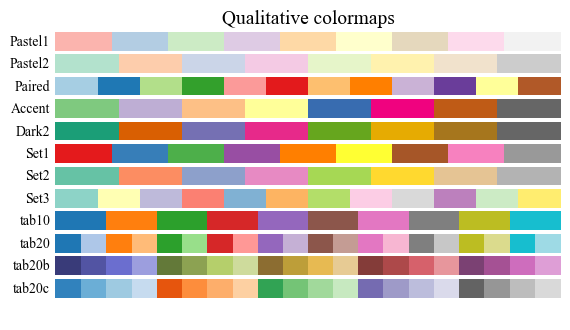

In [134]:
# plot results
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# here..
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

x_y_label_font = 20
x_y_legend_font = 20

plt.rc('font', family='Times New Roman')
fig_dpi = 220
fig_shape_squre = (6, 5)

def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh), dpi=100)
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list
    plt.show()


class MyColor(object):
    def __init__(self, cmap_name, skip_idx=5, backup_name='Set1', 
                 backup_color=3, add_red=False, pre_defined=False):
        if pre_defined:
            # colors = ['#3682be','#45a776','#f05326','#eed777','#334f65','#b3974e','#38cb7d','#ddae33','#844bb3','#93c555','#5f6694','#df3881']
            colors = '00a8e1 - 99cc00 - e30039 - 800080 - 00994e - ff6600 - 808000 - db00c2 - 008080 - 0000ff - c8cc00'
            colors = ["#"+c.strip() for c in colors.split('-')]
            print(colors)
            cmap = ListedColormap(colors, name = 'mycmap')
            self.color_set = list(cmap.colors)
        else:
            if isinstance(cmap_name, list):
                #NOTE: combine all cmaps:
                self.color_set = []
                for cname in cmap_name:
                    self.color_set.extend(list(plt.get_cmap(cname).colors))
                print('color_set: ', self.color_set[15])
            else:
                self.color_set = list(plt.get_cmap(cmap_name).colors)
                
        # NOTE: always ignore light yellow in Set1

        if add_red:
            self.light_set = list(plt.get_cmap('Set1').colors)
            self.color_set  = [v for i, v in enumerate(list(plt.get_cmap(cmap_name).colors)[:-1]) if i!=5]
            self.color_set.extend([self.light_set[0]])
            self.color_set.extend([self.light_set[4]])

        self.backup_set = plt.get_cmap(backup_name).colors
        self.backup_color = backup_color
        self.skip_idx=skip_idx
        self.idx = 0
        self.color_len = len(self.color_set)
        
    def get_color(self):
        if self.idx == self.color_len - 1:
            self.idx = 0
        if self.idx == self.skip_idx:
            self.idx += 1
            return self.backup_set[self.backup_color]
        color = self.color_set[self.idx]
        self.idx += 1
        return color
    
    def shuffle(self):
        np.random.shuffle(self.color_set)
    

plot_color_gradients('Qualitative',
                     ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
                      'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                      'tab20c'])


# load all results from logs:

In [136]:
import os
import json
import generate_regression_datasets as grd

import importlib
importlib.reload(grd)

    # {"avg_TR_score": 10.000000000279954, "std_TR_score": 2.290051166528402e-10, "avg_TS_score": 10.00000001051161, "std_TS_score": 1.5722685459922009e-09, "avg_TR_ROCAUC": -1.0, 
    # "std_TR_ROCAUC": 0.0, "avg_TE_ROCAUC": -1.0, "std_TE_ROCAUC": 0.0}

dict_keys(['REDDIT-BINARY', 'REDDIT-MULTI-5K', 'COLLAB', 'IMDB-BINARY', 'IMDB-MULTI', 'NCI1', 'AIDS', 'ENZYMES', 'PROTEINS', 'DD', 'MUTAG', 'CSL', 'CIFAR10', 'MNIST', 'PPI', 'hiv', 'bace', 'bbpb', 'ogbg_molhiv', 'ogbg_ppa', 'PTC', 'QM9', 'ogbg_moltox21', 'ogbg-molbbbp', 'ogbg-molbace', 'syn_cc', 'syn_degree'])


<module 'generate_regression_datasets' from '/Users/lizhengdao/src/github/GenerativeGNN/generate_regression_datasets.py'>

In [229]:
log_results = {}

for k, log_path in grd.data_log_path_dict.items():
      if k.startswith('syn'):
            continue
      MLP_log_path_attr, GNN_log_path_attr, MLP_log_path_degree ,GNN_log_path_degree, GCN_log_path_attr, GCN_log_path_degree = log_path
      grd.load_log_to_log_results(log_results, MLP_log_path_attr, GNN_log_path_attr,
                                  MLP_log_path_degree ,GNN_log_path_degree,
                                  GCN_log_path_attr, GCN_log_path_degree)

data name: MUTAG
data name: DD
data name: PROTEINS
data name: ENZYMES
data name: AIDS
data name: NCI1
data name: molhiv
data name: moltox21
data name: ogbg-molbace
data name: ppa
data name: CIFAR10
data name: MNIST
data name: IMDB-BINARY
data name: IMDB-MULTI
data name: COLLAB
data name: REDDIT-BINARY


# extract 

In [233]:
ids = ['GraphKernel', 'MLP(Degree)', 'GNN(Degree)','GNN(Degree-shuffled)', 'GNN(PageRank)', 'GNN(Gaussian)',
       'MLP(Attr)', 'GNN(Attribute)', 'GNN(Mix)', 'GNN(Decoupled)']

ids = {k:i for i, k in enumerate(ids)}
print('ids:', ids)

# data name: MNIST
# data name: CIFAR10
# data name: NCI1
# data name: IMDB-BINARY
# data name: IMDB-MULTI
# data name: molhiv
# data name: moltox21
# data name: ogbg-molbace
# data name: ppa
# data name: DD
# data name: PROTEINS
# data name: ENZYMES
# data name: MUTAG

results = \
{'MUTAG': [(86.23, 8.50 ),( 84.78,7.71 ),( 87.28,6.54 ),( 68.30,10.89),( 60.65,9.54 ),( 59.82,7.63)], 
"PROTEINS":[( 72.50,2.58 ),( 72.48,2.62 ),( 71.09,3.11 ),( 66.92,3.41 ),( 68.00,5.50 ),(66.92,3.41)],
"DD": [(76.06,3.21 ),( 67.59,4.65 ),( 69.58,3.11 ),( 62.10,3.40 ),    (62.10,3.40),           (62.10,3.40)],
"NCI1":[( 62.50,1.79 ),( 59.10,3.39 ),( 70.02,2.02 ),( 63.77,1.79 ),    ( 51.75,3.38 ), ( 51.75,3.38 )],
"ENZYMES": [( 25.00,3.33 ),( 23.67,4.25 ),( 27.33,4.24 ),( 20.16,5.00 ),( 16.77,4.35 ), (0.0,0.0)],
"CIFAR10": [(14.62, 0.0),(14.44, 0.0),(10.25, 0.0),(10.25, 0.0),(10.25, 0.0),(10.25, 0.0)],
"molhiv": [(51, 0.0), (74.95, 0.0),(66.00, 0.0),(66.00, 0.0),(10.25, 0.0),(10.25, 0.0)],
"MNIST": [(0.000000, 0.0),(18.60, 0.0),(10.22, 0.0),(10.25, 0.0),(10.25, 0.0),(10.25, 0.0)],
"ogbg-molbace": [(0.000000, 0.0),(47.13, 0.0),(74.79, 0.0),(0.0, 0.0),(0.0, 0.0),(0.0, 0.0)],
"moltox21": [(0.000000, 0.0),(50.50, 0.0),(65.19, 0.0),(0.0, 0.0),(0.0, 0.0),(0.0, 0.0)],
"ppa": [(0.000000, 0.0),(50.50, 0.0),(65.19, 0.0),(0.0, 0.0),(0.0, 0.0),(0.0, 0.0)],
"IMDB-MULTI": [(0.000000, 0.0),(50.50, 0.0),(65.19, 0.0),(0.0, 0.0),(0.0, 0.0),(0.0, 0.0)],
"IMDB-BINARY": [(0.000000, 0.0),(50.50, 0.0),(65.19, 0.0),(0.0, 0.0),(0.0, 0.0),(0.0, 0.0)],
'COLLAB':  [(63.92, 1.63), (59.10, 3.39), (69.92, 1.09),(0.0, 0.0),(0.0, 0.0),(0.0, 0.0)],
'REDDIT-BINARY': [(73.5, 2.0494), (77.62, 2.98), (87.26, 1.52),(0.0, 0.0),(0.0, 0.0),(0.0, 0.0)],
"AIDS": [(0.000000, 0.0),(98.15, 1.05),(99.38, 0.62),(0.0, 0.0),(0.0, 0.0),(0.0, 0.0)]
}

results_attr = {'MUTAG':[(83.50, 8.85), (86.24,7.54), (85.83,6.65),(87.84,6.48)],
'PROTEINS':[(75.32, 3.16), (72.47,2.96), (72.28,3.08),(73.13,3.27)],
'DD':[(74.96, 2.83), (71.08,3.01), (69.33,2.95),(72.48,3.79)],
'NCI1':[(66.71, 2.09), (75.37,3.39), (79.34,2.26),(79.80,2.27)],
'ENZYMES':[(29.17, 6.31), (34.61,4.35), (37.38,5.01),(32.61,3.00)],
"CIFAR10":[(25.47, 0.0), (44.13, 0.0), (43.76,0.0),(43.98,0.0)],
"molhiv":[(73.95, 0.0),(75.38, 0), (72.70,0.0), (75.95,0.0)],
"MNIST":[(18.60, 0.0),(73.72, 0), (68.97,0.0), (55.85,0.0)],
"ogbg-molbace":[(73.71, 0.0),(68.93, 0), (73.45,0.0), (0.0,0.0)],
"moltox21":[(71.56, 0.0),(75.91, 0), (75.60,0.0), (0.0,0.0)],
"IMDB-MULTI":[(71.56, 0.0),(75.91, 0), (75.60,0.0), (0.0,0.0)],
"IMDB-BINARY":[(71.56, 0.0),(75.91, 0), (75.60,0.0), (0.0,0.0)],
"ppa":[(71.56, 0.0),(75.91, 0), (75.60,0.0), (0.0,0.0)],
'REDDIT-BINARY': [(0.000000, 0.0),(0.50, 0.0),(65.19, 0.0),(0.0, 0.0)],
'COLLAB':  [(0.000000, 0.0),(.0, 0.0),(65.19, 0.0),(0.0, 0.0)],
"AIDS":[(97.58, 0.0),(98.27, 1.68), (95.90, 1.68), (0.0,0.0)]
}

# combine:
for k in results.keys():
    results[k].extend(results_attr[k])

# sort:
names = ['GNN(Degree)', 'GraphKernel', 'MLP(Degree)', 'GNN(Attribute)', 'GNN(Mix)', 'GNN(Decoupled)']

names = ['MLP(Attr)', 'GNN(Attribute)', 'MLP(Degree)', 'GraphKernel', 'GNN(Degree)']

for k in results.keys():
    new_v = [results[k][ids[name]] for name in names]
    results[k] = new_v

show_data_struct = ['MUTAG','PROTEINS', 'DD',  'NCI1', 'ENZYMES', 'molhiv', 
             'ogbg-molbace', 'moltox21', 'AIDS','IMDB-MULTI', 'IMDB-BINARY',
             'REDDIT-BINARY', 'COLLAB', 'ppa', 'MNIST', 'CIFAR10']

show_data_attr = ['MUTAG','PROTEINS', 'DD',  'NCI1', 'ENZYMES', 'molhiv', 
             'ogbg-molbace', 'moltox21', 'AIDS', 'ppa', 'MNIST', 'CIFAR10']


def get_data_block(results, names):
    data_block = []
    for name in names:
        data_block.append(results[name])
    return np.array(data_block)


attr_data_block = get_data_block(results, show_data_attr)
struct_data_block = get_data_block(results, show_data_struct)

# copy and concat attr_data_block:
attr_data_block = np.concatenate([attr_data_block, attr_data_block], axis=2)
struct_data_block = np.concatenate([struct_data_block, struct_data_block], axis=2)


ids: {'GraphKernel': 0, 'MLP(Degree)': 1, 'GNN(Degree)': 2, 'GNN(Degree-shuffled)': 3, 'GNN(PageRank)': 4, 'GNN(Gaussian)': 5, 'MLP(Attr)': 6, 'GNN(Attribute)': 7, 'GNN(Mix)': 8, 'GNN(Decoupled)': 9}


In [234]:
log_results['AIDS'][0]


[(99.06666694132488, 0.8537497041081125),
 (97.88541666666667, 2.086481995622186)]

In [235]:
"""new_res:

MLP_log_path_degree
GNN_log_path_degree
MLP_log_path_attr
GNN_log_path_attr

replace:
names = ['MLP(Attr)', 'GNN(Attribute)', 'MLP(Degree)', 'GraphKernel', 'GNN(Degree)']

"""
def replace_data(data_block, names):
    gcn_res = []
    for i, name in enumerate(names):
        new_v = np.array(log_results[name])
        new_v = new_v.reshape((new_v.shape[0], 2 * new_v.shape[1]))
        # some datasets use roc_auc:
        """
        data name: MUTAG
        data name: DD
        data name: PROTEINS
        data name: ENZYMES
        data name: CIFAR10
        data name: MNIST
        data name: AIDS
        data name: NCI1
        data name: IMDB-BINARY
        data name: IMDB-MULTI
        data name: COLLAB
        data name: REDDIT-BINARY
        data name: molhiv
        data name: moltox21
        data name: ogbg-molbace
        data name: ppa
        """
        data_block[i, 0] = new_v[0].squeeze() # MLP attr
        print('new_v shape: ', new_v[0].squeeze().shape)
        data_block[i, 1] = new_v[1].squeeze()  # GNN attr
        data_block[i, 2] = new_v[2].squeeze()  # MLP degree
        data_block[i, 4] = new_v[3].squeeze()  # GNN degree
        gcn_res.append(new_v[4:])
    
    gcn_res = np.array(gcn_res)
    data_block = np.concatenate([data_block, gcn_res], axis=1)
    return data_block
        # extend 


attr_data_block = replace_data(attr_data_block, show_data_attr)
struct_data_block = replace_data(struct_data_block, show_data_struct)

print(attr_data_block.shape)

new_v shape:  (4,)
new_v shape:  (4,)
new_v shape:  (4,)
new_v shape:  (4,)
new_v shape:  (4,)
new_v shape:  (4,)
new_v shape:  (4,)
new_v shape:  (4,)
new_v shape:  (4,)
new_v shape:  (4,)
new_v shape:  (4,)
new_v shape:  (4,)
new_v shape:  (4,)
new_v shape:  (4,)
new_v shape:  (4,)
new_v shape:  (4,)
new_v shape:  (4,)
new_v shape:  (4,)
new_v shape:  (4,)
new_v shape:  (4,)
new_v shape:  (4,)
new_v shape:  (4,)
new_v shape:  (4,)
new_v shape:  (4,)
new_v shape:  (4,)
new_v shape:  (4,)
new_v shape:  (4,)
new_v shape:  (4,)
(12, 7, 4)


# generate latex table using all data_blocks

In [236]:
# generate latex table using all data_blocks

print(struct_data_block.shape)

from tabulate import tabulate

B = struct_data_block
L = show_data_struct

latex_names = ['\mathcal{M}^{\\text{Baseline}}_\\textbf{A}', '\mathcal{M}^{\\text{GNN}}_\\textbf{A}',
               '\mathcal{M}^{\\text{Baseline}}_\\textbf{A}',
               '\mathcal{M}^{\\text{GraphKernel}}_\\textbf{A}',
               '\mathcal{M}^{\\text{GIN}}_\\textbf{S}','\mathcal{M}^{\\text{GIN}}_\\textbf{S+A}' ]


M = [latex_names[i] for i in range(len(names))]

# Prepare the headers
headers = ["Dataset"] + M

# Prepare the rows
rows = []
for dataset_name, dataset_values in zip(L, B):
    row = [dataset_name]
    for value in dataset_values:
        mean, std_dev, roc_mean, roc_std = value
        mean_rounded = round(mean, 2)
        std_dev = round(std_dev, 2)
        row.append(f"{mean_rounded} pm {std_dev}")
    rows.append(row)

# Generate the LaTeX table
# latex_table = tabulate(rows, headers=headers, tablefmt="latex")
latex_table = tabulate(rows, tablefmt="latex")

# Uncomment the line below to print the LaTeX table
print('\\begin{table*}[t]')
print('\small')
latex_names = ["$"+ n + "$ &"  for n in latex_names]
print("Dataset & "+"  ".join(latex_names))
print(str(latex_table).replace('pm', '$\pm$'))
print('\end{table*}')

(16, 7, 4)
\begin{table*}[t]
\small
Dataset & $\mathcal{M}^{\text{Baseline}}_\textbf{A}$ &  $\mathcal{M}^{\text{GNN}}_\textbf{A}$ &  $\mathcal{M}^{\text{Baseline}}_\textbf{A}$ &  $\mathcal{M}^{\text{GraphKernel}}_\textbf{A}$ &  $\mathcal{M}^{\text{GIN}}_\textbf{S}$ &  $\mathcal{M}^{\text{GIN}}_\textbf{S+A}$ &
\begin{tabular}{llllllll}
\hline
 MUTAG         & 83.7 $\pm$ 8.35  & 84.07 $\pm$ 6.26 & 79.18 $\pm$ 9.83 & 86.23 $\pm$ 8.5  & 86.71 $\pm$ 4.67 & 70.7 $\pm$ 6.89  & 82.86 $\pm$ 10.43 \\
 PROTEINS      & 74.24 $\pm$ 3.09 & 70.97 $\pm$ 3.79 & 60.95 $\pm$ 0.79 & 72.5 $\pm$ 2.58  & 68.24 $\pm$ 4.39 & 73.28 $\pm$ 3.22 & 64.29 $\pm$ 2.6   \\
 DD            & 76.12 $\pm$ 2.78 & 72.22 $\pm$ 3.18 & 62.29 $\pm$ 2.55 & 76.06 $\pm$ 3.21 & 62.73 $\pm$ 2.23 & 70.49 $\pm$ 2.13 & 64.03 $\pm$ 2.64  \\
 NCI1          & 66.76 $\pm$ 1.98 & 80.54 $\pm$ 1.16 & 50.58 $\pm$ 1.02 & 62.5 $\pm$ 1.79  & 75.55 $\pm$ 1.31 & 76.85 $\pm$ 2.78 & 65.03 $\pm$ 2.43  \\
 ENZYMES       & 29.67 $\pm$ 5.74 & 41.78 $\pm$ 

In [253]:
def label_replace(cur_label:str):
    if cur_label == 'ogbg-molbace':
        return 'BACE'
    elif cur_label == 'moltox21':
        return 'Tox21'
    elif cur_label == 'molhiv':
        return 'HIV'
    elif cur_label == 'IMDB-MULTI':
        return 'IMDB-M'
    elif cur_label == 'IMDB-BINARY':
        return 'IMDB-B'
    elif cur_label == 'ppa':
        return 'PPA'
    elif cur_label == 'REDDIT-BINARY':
        return 'REDDIT-B'
    else:
        return cur_label


def plot_gap(es1, es2, title, cus_fsize, acc=True):
    fig, ax = plt.subplots(figsize=cus_fsize, dpi=100)
    
    ax.plot(es1, '-', color='lightblue', markersize=5)
    ax.plot(es2,'-', color='pink', markersize=5)
        
            
    # hide the top and right boundary:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # set xticks label fontsize:
    ax.set_xticks(range(len(labels)))
    
    # ax.set_xticklabels(labels, rotation=45, ha='center', fontsize=18)
    ax.set_xticklabels(labels, rotation=45, ha='center', fontsize=17)
    ax.set_axisbelow(True)
    ax.grid(linestyle='dashed',zorder=0)
    # ax.set_ylabel('Structural Performance Gap', fontsize=15)
    # ax.set_title(title)
    ax.yaxis.set_tick_params(labelsize=18)
    
    
def plot_gap_cur_bar(a, b, c, cus_fsize=None):
    # a: curve_roc, b: curve_acc_gin, c: curve_acc_gcn
    
    print('a shape: ', a[0][0].shape)
    sort_by_gin = 1 # 0: gin (roc), 1: gin, 2: gcn
    sort_by_acc = 0 # roc: 2, roc_std: 3,  acc: 0, acc_std: 1
    
    es = zip(a, b, c)
    e_res = sorted(es, key=lambda x: x[sort_by_gin][0].squeeze()[sort_by_acc])
    
    labels = [label_replace(e[sort_by_gin][1]) for e in e_res]
    
    es1 = [e[0][0][2] for e in e_res] # roc=2
    es2 = [e[1][0][0] for e in e_res] # acc=0
    es3 = [e[2][0][0] for e in e_res] # acc=0
    
    fsize = cus_fsize
    fig, (ax1, ax2) = plt.subplots(2, 1, dpi=150, figsize=fsize, gridspec_kw={'height_ratios': [1, 2]})
    x = np.arange(len(es1))  # assuming all arrays are of same length

    # Define width of bars and gap between paired bars
    bar_width = 0.35
    gap_width = 0.05


    # Plotting curve of a in the first subplot
    ax1.plot(x, es1, color='lightblue')
    ax1.scatter(x, es1, marker='o', color='lightblue')
    
    # ax1.set_title('Plot for array a')
    # ax1.set_xlabel('Index')
    ax1.set_ylabel('AUC Gap (%)', fontsize=18)
    ax1.grid(axis='y', linestyle='--')  # Add horizontal dashed grid lines
    ax1.set_xlim(left=-0.9)  # Ensures the x-axis starts at 0
    ax1.set_xlim(right=7.9)  # Ensures the x-axis starts at 0
    ax1.set_xticklabels(['' for _ in ax1.get_xticks()])  # Hide x-tick labels

    y1_ticks = [int(i) for i in np.linspace(ax1.get_ybound()[0], ax1.get_ybound()[1], 5)]
    ax1.yaxis.set_ticks(y1_ticks)

    # Plotting bars for b and c in the second subplot
    ax2.bar(x - bar_width/2 - gap_width/2,
            es2, bar_width, color='pink',
            hatch='\\', edgecolor='black', linewidth=0.5, label='GIN')
    ax2.bar(x + bar_width/2 + gap_width/2, 
            es3, bar_width,
            hatch='\\', edgecolor='black', linewidth=0.5, color='lightblue', label='GCN')
    # ax2.set_title('Bar plots for arrays b and c')
    ax2.set_ylabel('Accuracy Gap (%)',fontsize=18)
    ax2.legend(fontsize=16)
    ax2.grid(axis='both', linestyle='--')  # Add vertical and horizontal dashed grid lines

    # Align x-axis ticks for both subplots
    ax1.set_xticks(x)
    ax2.set_xticks(x)
    ax2.set_xticklabels(labels, rotation=45, ha='center', fontsize=17)
    ax2.set_axisbelow(True)
    ax2.yaxis.set_tick_params(labelsize=18)
    ax1.yaxis.set_tick_params(labelsize=18)

    ax2.spines['top'].set_visible(False)  # Hide top spine
    ax2.spines['right'].set_visible(False)  # Hide right spine
    
    y2_ticks = [int(i) for i in np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 5)]
    ax2.yaxis.set_ticks(y2_ticks)
    
    plt.tight_layout()
    plt.show()
    
    
def plot_gap_bar(es, title, cus_fsize=None, acc=True, add_curve=False, es2=None):
    
    idx = 0 if acc else 2
    e_res = sorted(es, key=lambda x: x[0].squeeze()[idx])
    
    labels = [label_replace(e[1]) for e in e_res]

    if add_curve and es2 is not None:
        e_res2 = [e[0].squeeze()[idx] for e in es2 if label_replace(e[1]) in labels]
    
    # set figure size:
    if title == 'Structural Performance Gap':
        fsize = (12, 6)
    else:
        fsize = (10, 6)
    
    if cus_fsize is not None:
        fsize = cus_fsize
    
    fig, ax = plt.subplots(figsize=fsize, dpi=100)
    for i, e in enumerate(e_res):
        # set another color of the bar if the value is less than 10:
        bar_color = 'lightblue' if e[0].squeeze()[idx] > 10 else 'pink'
        bar_color = '#D0324B' if e[0].squeeze()[idx] > 10 else 'gray'
        # bar_color = '#D0324B'
        bars = ax.bar(e[1], e[0].squeeze()[idx], label=e[1], alpha=0.9, color=bar_color,
                      hatch='//', edgecolor='black', linewidth=0.5)
        
        if add_curve:
            ax.plot(e[1], e_res2[i], color='black', marker='o')
        
        # if labels[i] in ['HIV', 'Tox21', 'BACE']:
        #     bar_color = 'lightblue' if e[0].squeeze()[2] > 10 else 'pink'
        #     bars = ax.bar(e[1], e[0].squeeze()[0], label=e[1], alpha=0.9, color=bar_color, hatch='\\', edgecolor='black', linewidth=0.5)
            
    # hide the top and right boundary:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # set xticks label fontsize:
    ax.set_xticks(range(len(labels)))
    ax.set_ylabel(f'{title} (%)', fontsize=20)
    # ax.set_xticklabels(labels, rotation=45, ha='center', fontsize=18)
    ax.set_xticklabels(labels, rotation=45, ha='center', fontsize=17)
    ax.set_axisbelow(True)
    ax.grid(linestyle='dashed',zorder=0)
    # ax.set_ylabel('Structural Performance Gap', fontsize=15)
    # ax.set_title(title)
    ax.yaxis.set_tick_params(labelsize=18)
    

# plot performance gap:


In [238]:
# Effectiveness 
# non-attribute datasets:

def get_performance_gap(data_block, gcn=False):
    # calculate the difference between data_block[:, 0] and data_block[:, 1]
    if gcn:
        attr_gap = data_block[:, 5] - data_block[:, 0]  # GIN_attr - MLP_attr
        struct_gap = data_block[:, 6] - data_block[:, 2] # GIN_struct - MLP_struct
    else:
        attr_gap = data_block[:, 1] - data_block[:, 0]  # GIN_attr - MLP_attr
        struct_gap = data_block[:, 4] - data_block[:, 2] # GIN_struct - MLP_struct
        
    return attr_gap.squeeze(), struct_gap.squeeze()

# NOTE: get E for each dataset:

# all:
attr_gaps, _ = get_performance_gap(attr_data_block)
_, struct_gaps = get_performance_gap(struct_data_block)



# roc gin:
roc_attr_data = []
roc_attr_name = []
roc_struct_data = []
roc_struct_name = []


for i in range(attr_data_block.shape[0]):
    if attr_data_block[i, 0, 2] > 0 and attr_data_block[i, 1, 2] > 0:
        roc_attr_data.append(attr_data_block[i])
        roc_attr_name.append(show_data_attr[i])

for i in range(struct_data_block.shape[0]):
    if struct_data_block[i, 2, 2] > 0 and struct_data_block[i, 4, 2] > 0:
        roc_struct_data.append(struct_data_block[i])
        roc_struct_name.append(show_data_struct[i])

roc_data = np.array(roc_struct_data)
print('roc_data shape: ', roc_data.shape)
print('roc_data shape: ', roc_data[0])


roc_attr_gaps, _ = get_performance_gap(np.array(roc_attr_data))
_, roc_struct_gaps = get_performance_gap(np.array(roc_struct_data))


gcn_roc_attr_gaps, _ = get_performance_gap(np.array(roc_attr_data), gcn=True)
_, gcn_roc_struct_gaps = get_performance_gap(np.array(roc_struct_data), gcn=True)

print('roc_data gap: ', roc_struct_gaps[0])

# acc gcn
gcn_acc_data_attr = []
gcn_acc_data_attr_name = []

gcn_acc_data_struct = []
gcn_acc_data_struct_name = []

for i in range(attr_data_block.shape[0]):
    if not np.isnan(attr_data_block[i, 5, 0]).any():
        gcn_acc_data_attr.append(attr_data_block[i])
        gcn_acc_data_attr_name.append(show_data_attr[i])

for i in range(struct_data_block.shape[0]):
    if not np.isnan(struct_data_block[i, 6, 0]).any():
        gcn_acc_data_struct.append(struct_data_block[i])
        gcn_acc_data_struct_name.append(show_data_struct[i])

gcn_attr_gaps, _ = get_performance_gap(np.array(gcn_acc_data_attr), gcn=True)
_, gcn_struct_gaps = get_performance_gap(np.array(gcn_acc_data_struct), gcn=True)

print('gcn_acc_data_attr_name len', len(gcn_acc_data_attr_name))
print('gcn_acc_data_struct_name len', len(gcn_acc_data_struct_name))



colors = ["#0072B2", "#009E73", "#D55E00", "#E69F00", "#CC79A7"]

roc_data shape:  (10, 7, 4)
roc_data shape:  [[83.70370483  8.35309378 80.73717949  9.74934412]
 [84.07407506  6.26095208 83.1959707   8.16286917]
 [79.18128802  9.83152115 79.68711844 11.68673716]
 [86.23        8.5        86.23        8.5       ]
 [86.70565389  4.67067986 85.41971917  7.2742917 ]
 [70.70175527  6.89204527 62.17490842  6.08517096]
 [82.85575129 10.43444601 80.86233211 12.75733103]]
roc_data gap:  [ 7.52436587 -5.16084129  5.73260073 -4.41244546]
gcn_acc_data_attr_name len 10
gcn_acc_data_struct_name len 16


In [239]:
listzip = lambda *x: list(zip(*x))

attr_es = listzip(attr_gaps, show_data_attr)
struct_es = listzip(struct_gaps, show_data_struct)

roc_attr_es = listzip(roc_attr_gaps, roc_attr_name)
roc_struct_es = listzip(roc_struct_gaps, roc_struct_name)

gcn_attr_es = listzip(gcn_attr_gaps, gcn_acc_data_attr_name)
gcn_struct_es = listzip(gcn_struct_gaps, gcn_acc_data_struct_name)


gcn_roc_attr_es = listzip(gcn_roc_attr_gaps, roc_attr_name)
gcn_roc_struct_es = listzip(gcn_roc_struct_gaps, roc_struct_name)

# plot points: (attr_gap, struct_gap) or (attr_gap_acc, attr_gap_roc)


['#00a8e1', '#99cc00', '#e30039', '#800080', '#00994e', '#ff6600', '#808000', '#db00c2', '#008080', '#0000ff', '#c8cc00']
16 {'ENZYMES', 'HIV', 'COLLAB', 'AIDS', 'NCI1', 'PPA', 'REDDIT-B', 'IMDB-B', 'MUTAG', 'Tox21', 'DD', 'PROTEINS', 'CIFAR10', 'MNIST', 'IMDB-M', 'BACE'}


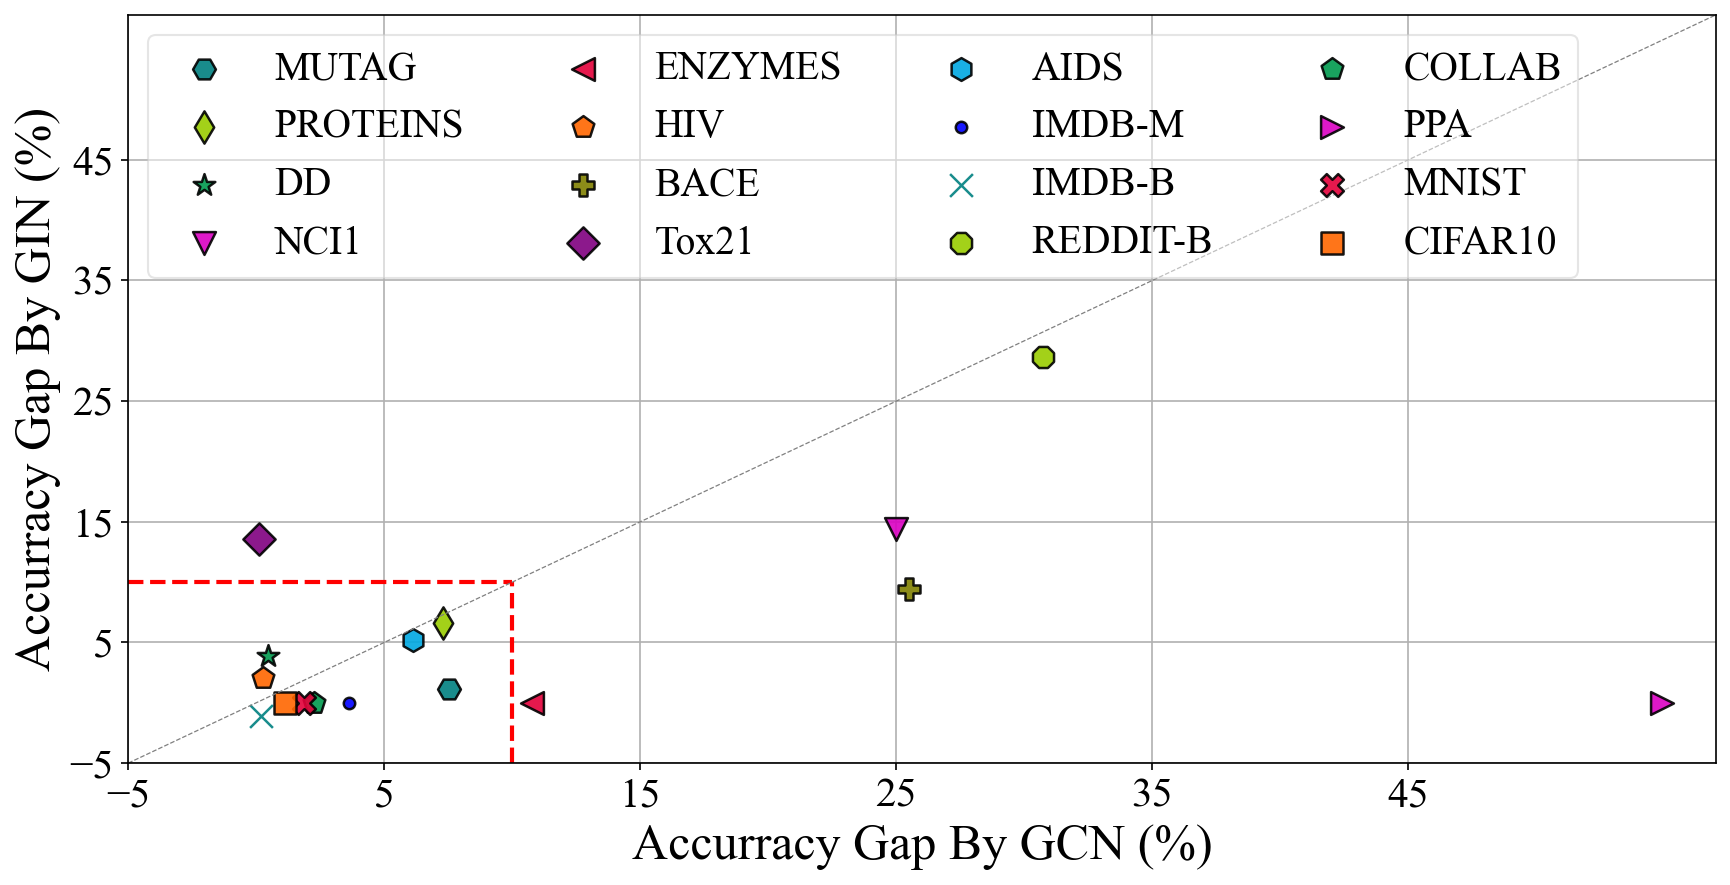

10 {'ENZYMES', 'HIV', 'AIDS', 'NCI1', 'PPA', 'MUTAG', 'Tox21', 'DD', 'PROTEINS', 'BACE'}


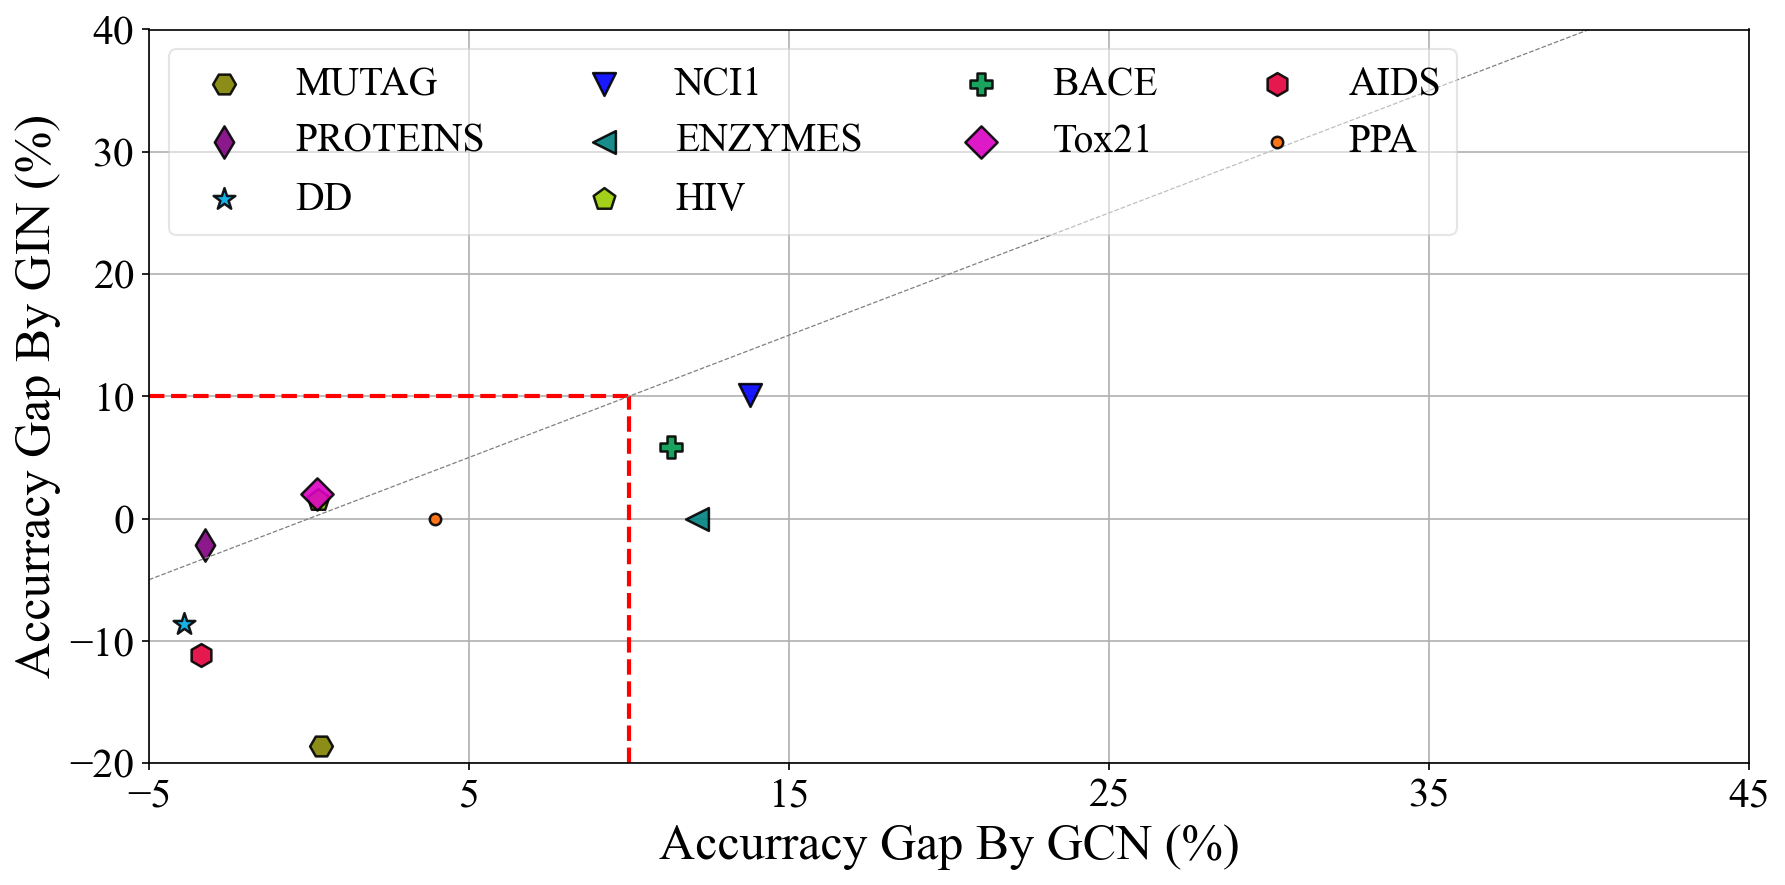

In [419]:

# groups = [group1,group2,group3 ]
my_color = MyColor(cmap_name=['Dark2', 'Set1'], skip_idx=-1, pre_defined=True)
my_color.shuffle()
markers = ['o', 'v', '^', 's', '*', 'D', 'P', 'h','X','<', '>']
markers = ['o', 'v', '^', 's', '*', 'D', 'P', 'h','X','<', '>']

scatter_marker_styles = ['.', ',', 'o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'x', 'D', 'd', '8', 's', 'p', 'P', 'X']


np.random.shuffle(scatter_marker_styles)

marker = None

def plot_points(ax, x, y, point_labels, x_label="", y_label="",title=None,
                border_style='-', x_lim=None, y_lim=None, x_ticks=None, y_ticks=None):
    
    if x_lim is not None:
        x_min = x_lim[0]
    if y_lim is not None:
        y_min = y_lim[0]
        
    ax.plot([x_min, 10], [10, 10], linestyle='--', color='red',linewidth=2)
    ax.plot([10, 10], [y_min, 10], linestyle='--', color='red',linewidth=2)


    ax.plot([x_ticks[0], 100], [x_ticks[0], 100], linestyle='--', color='gray',linewidth=0.6)

    
    # ax.set_aspect('equal', 'box')
    
    legend_hand = []
    for i in range(len(point_labels)):
        
        if x[i] > 10 or y[i] > 10:
            color = 'lightblue'
        else:
            color = 'pink'
            
        color = my_color.get_color()
        
        # plot scatter with dashed line edge:
        legend_hand.append(ax.scatter(x=x[i], y=y[i], color='black',
                   marker=scatter_marker_styles[i],
                   facecolor=color,
                   linestyle=border_style,
            linewidth=1.2,
            s=120,
            alpha=0.9,
            label=point_labels[i]))
        
    ax.grid()
    
    if x_lim is not None:
        ax.set_xlim(x_lim)
        
    if y_lim is not None:
        ax.set_ylim(y_lim)
    
    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)
    ax.set_axisbelow(True)
    ax.yaxis.set_tick_params(labelsize=20)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.set_xlabel(x_label, fontsize=24)
    ax.set_ylabel(y_label, fontsize=24)
    # ax2.spines['top'].set_visible(False)  # Hide top spine
    # ax2.spines['right'].set_visible(False)  # Hide right spine
    
    ax.set_facecolor('white')
    # ax.set_facecolor((1.0, 0.47, 0.42))

    ax.legend(ncol=4, fontsize=19, loc='upper left', framealpha=0.5)
    return legend_hand

# construct x and y:

def align_2es(es1, es2):
    s1 = set([label_replace(e[1]) for e in es1])
    s2 = set([label_replace(e[1]) for e in es2])
    # get intersection of s1 and s2:
    it_s = s1.intersection(s2)
    print(len(it_s), it_s)
    new_es1 = [e for e in es1 if label_replace(e[1]) in it_s]
    new_es2 = [e for e in es2 if label_replace(e[1]) in it_s]
    return new_es1, new_es2
    

acc = True
fig, axes = plt.subplots( figsize=(12, 6), dpi=150)
es1, es2 = align_2es(struct_es, gcn_struct_es)
labels_es1= [label_replace(e[1]) for e in es1]
idx = 0
x1 = [e[0].squeeze()[idx] for e in es1]
idx = 2
y1 = [e[0].squeeze()[idx] for e in es2]

xticks = [i for i in range(-5, 55, 10)]
yticks = [i for i in range(-5, 55, 10)]


plot_points(axes, x1, y1, labels_es1, x_label = 'Accurracy Gap By GCN (%)',
            y_label='Accurracy Gap By GIN (%)', x_lim=[-5, 57], y_lim=[-5, 57],
            x_ticks=xticks, y_ticks=yticks)

plt.tight_layout()
plt.show()



acc = True
fig, axes = plt.subplots( figsize=(12, 6), dpi=150)
es1, es2 = align_2es(attr_es, gcn_attr_es)
labels_es1= [label_replace(e[1]) for e in es1]
idx = 0
x1 = [e[0].squeeze()[idx] for e in es1]
idx = 2
y1 = [e[0].squeeze()[idx] for e in es2]

    
xticks = [i for i in range(-5, 55, 10)]
yticks = [i for i in range(-20, 45, 10)]

plot_points(axes, x1, y1, labels_es1, x_label = 'Accurracy Gap By GCN (%)', 
            y_label='Accurracy Gap By GIN (%)', x_lim=[-5, 20], y_lim=[-20, 20],
            x_ticks=xticks, y_ticks=yticks
            )

plt.tight_layout()
plt.show()


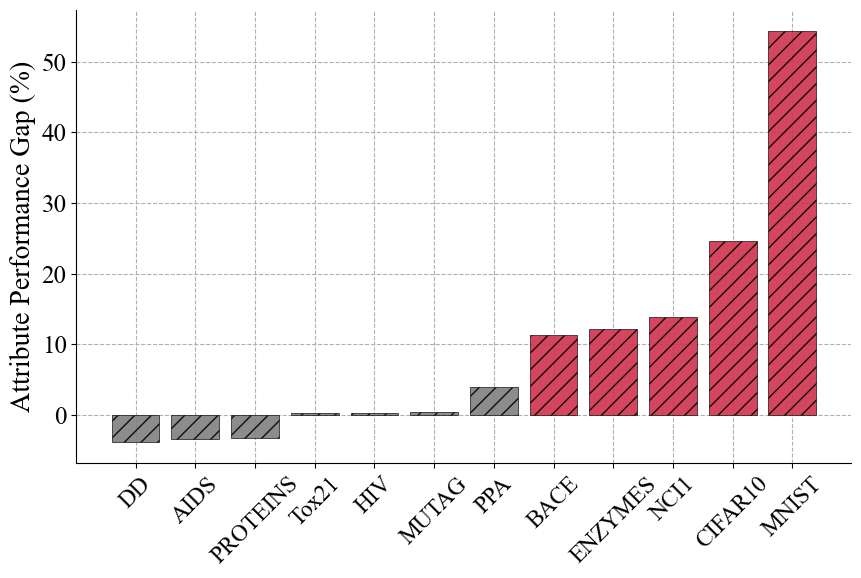

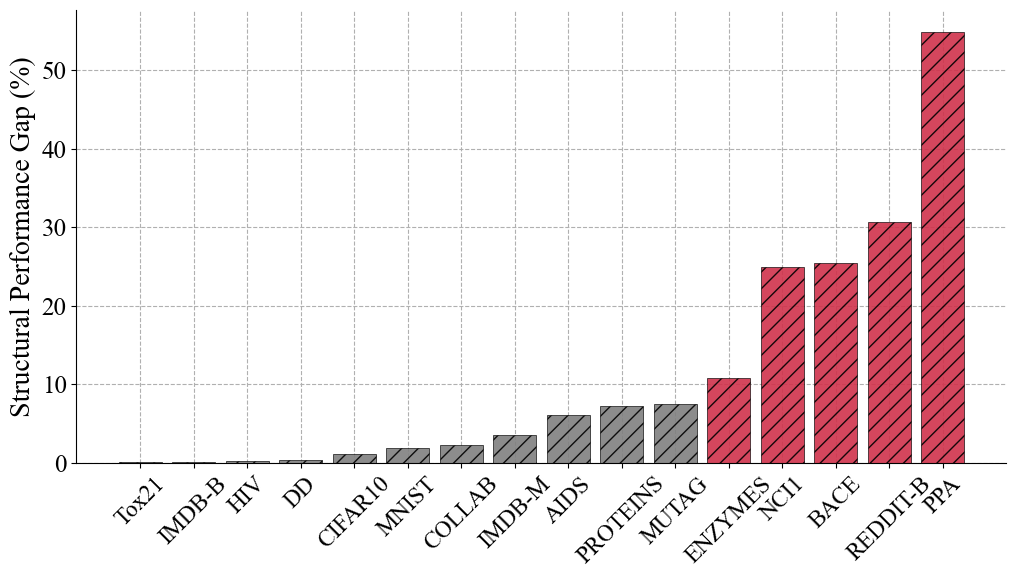

In [412]:
# filter not binary datasets:
# no proteins, AIDS, DD

plot_gap_bar(attr_es, 'Attribute Performance Gap')
plot_gap_bar(struct_es, 'Structural Performance Gap')

# plot synthetic gap and performance absolute value

In [ ]:
# load data, get acc







# plot gap of GCN GNN 

a shape:  (4,)


/var/folders/4n/148zpws12pg_5_jvdqkrr1p80000gn/T/ipykernel_57785/852219491.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['' for _ in ax1.get_xticks()])  # Hide x-tick labels


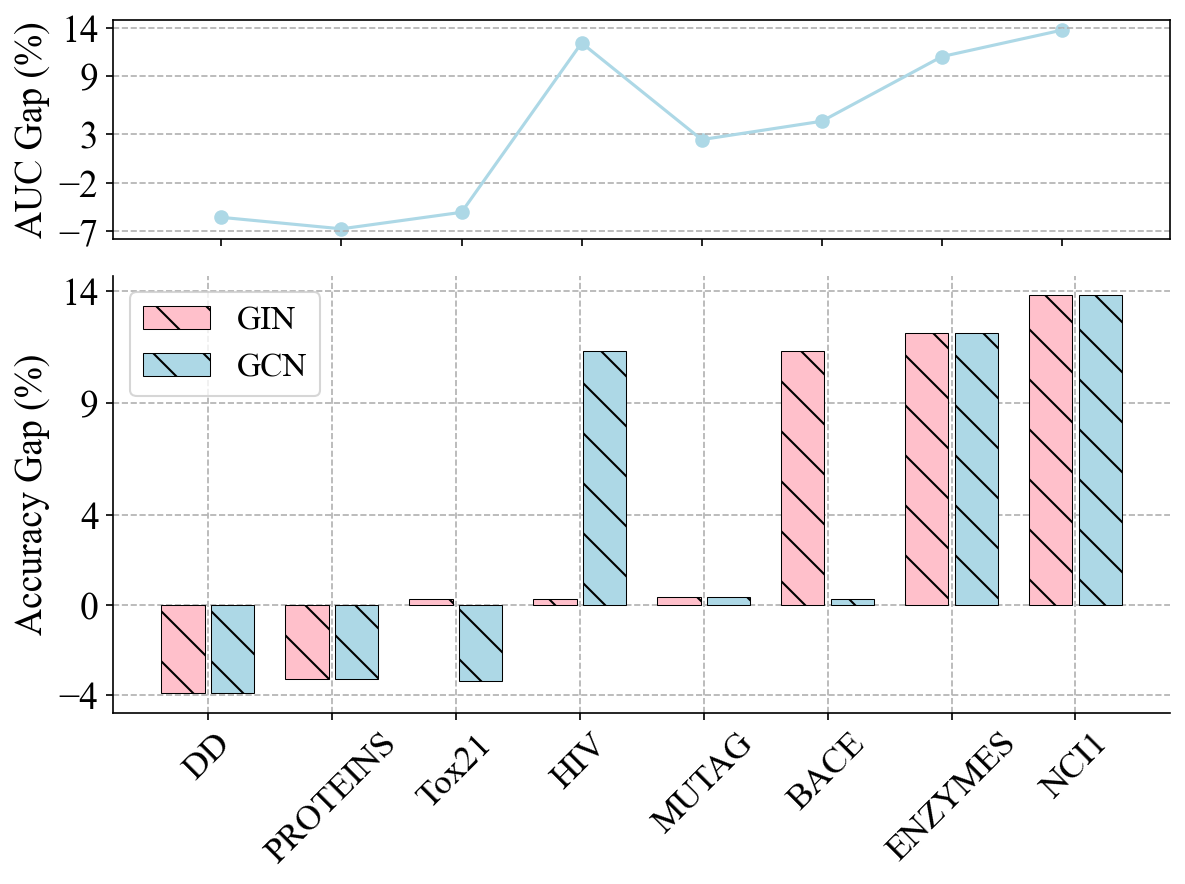

In [117]:
plot_gap_cur_bar(roc_attr_es, attr_es, gcn_attr_es, cus_fsize=(8, 6))

a shape:  (4,)


/var/folders/4n/148zpws12pg_5_jvdqkrr1p80000gn/T/ipykernel_57785/852219491.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['' for _ in ax1.get_xticks()])  # Hide x-tick labels


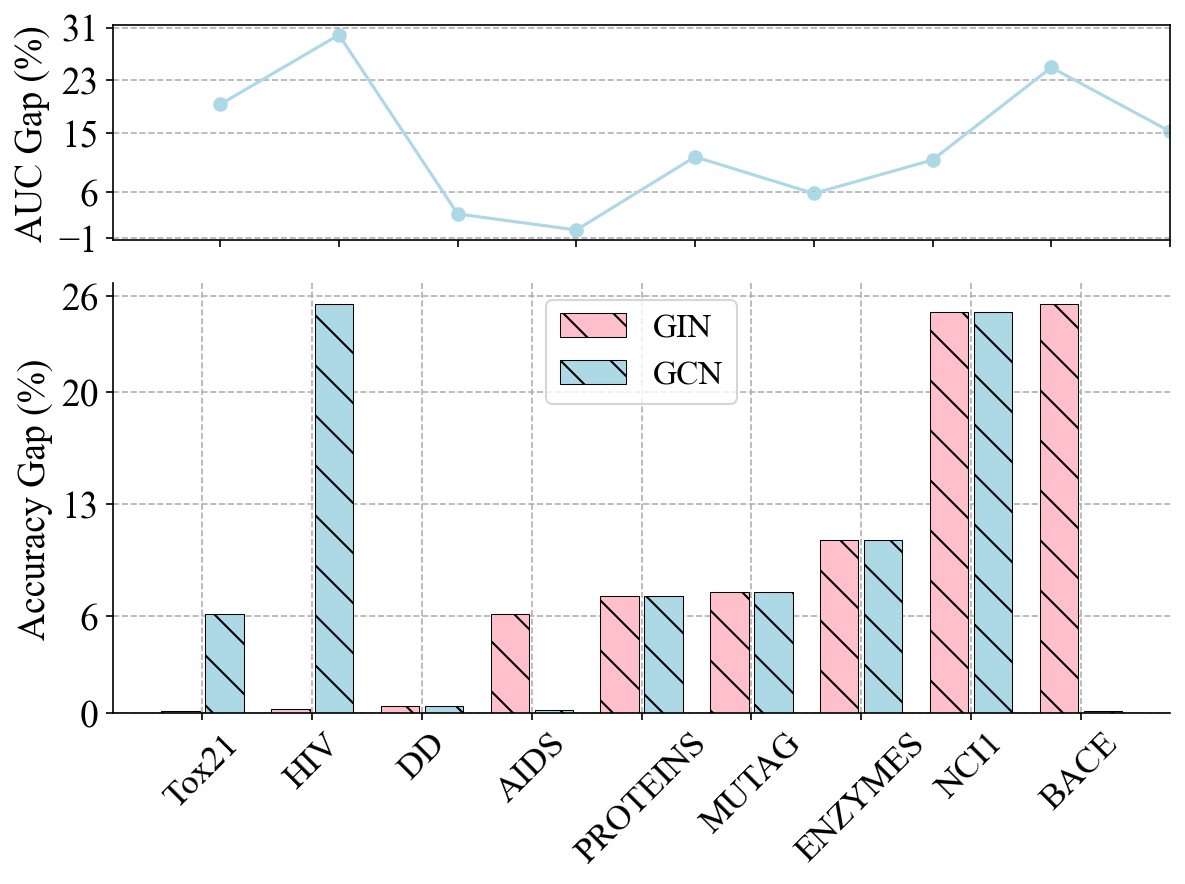

In [118]:
plot_gap_cur_bar(roc_struct_es, struct_es, gcn_struct_es, cus_fsize=(8, 6))

# load whole regression datasets:

In [8]:

# save datasets
import pickle as pk

def save_datasets(datasets, file_name):
    with open(file_name, 'wb') as f:
        pk.dump(datasets, f)

def load_datasets(file_name):
    with open(file_name, 'rb') as f:
        datasets = pk.load(f)
    return datasets


"""
- small: MUTAG, NCI1, DD, CIFAR10, MNIST, imdb_b, ogbg-molhiv, ogbg-molbace, ogbg-moltox21
- middle: ogbg-ppa, (ogbg-molpcba, ogbg-code2, to be done)
10-fold: MUTAG, NCI1, DD, CIFAR10, MNIST, imdb_b, SynCC
one split: ogbg-molhiv, ogbg-molbace, ogbg-moltox21, ogbg-ppa

use 10-fold to trian, use one split to test

"""
"""
Medium	ogbg-molpcba	>=1.2.2	437,929	26.0	28.1	128	Scaffold	Binary classification	AP
Medium	ogbg-ppa	>=1.1.1	158,100	243.4	2,266.1	1	Species	Multi-class classification	Accuracy
Medium	ogbg-code2
"""

# small scale: < 10k
""""
whole_aids_datasets.pkl
whole_cifar10_datasets.pkl
whole_dd_datasets.pkl
whole_enzymes_datasets.pkl
whole_imdb_b_datasets.pkl
whole_imdb_m_datasets.pkl
whole_minst_datasets.pkl
whole_mutag_datasets.pkl
whole_nci1_datasets.pkl
whole_ogbg_molbace_datasets.pkl
whole_ogbg_molhiv_datasets.pkl
whole_ogbg_moltox21_datasets.pkl
whole_proteins_datasets.pkl
"""

def label_replace(name:str):
    name = name.lower()
    if 'hiv' in name:
        return 'HIV'
    elif 'bace' in name:
        return 'BACE'
    elif 'tox21' in name:
        return 'Tox21'
    elif 'ppa' in name:
        return 'PPA'
    elif 'bace' in name:
        return 'BACE'
    return name.upper()


def load_all_datasets(pre_fix='whole_'):
    
    train_datasets_names = ['mutag', 'nci1', 'dd', 'imdb_b', 'imdb_m', 'mnist',
                            'cifar10', 'aids', 'enzymes', 'proteins']
    test_datasets_names = ['ogbg_molhiv', 'ogbg_moltox21', 'ogbg_molbace']

    train_datasets = []
    for k in train_datasets_names:
        train_datasets.append((load_datasets(f'{pre_fix}{k}_datasets.pkl'), k))

    test_datasets = []
        
    for k in test_datasets_names:
        test_datasets.append((load_datasets(f'{pre_fix}{k}_datasets.pkl'),k))
       
    all_datasets = train_datasets + test_datasets
    show_data = train_datasets_names + test_datasets_names 
    return all_datasets, show_data

import importlib
import generate_regression_datasets as grd

importlib.reload(grd)

as_whole = True
all_e = []
all_e.append((grd.generate_mutag(as_whole, return_E=True, dim_y=2), 'mutag'))
all_e.append((grd.generate_NCI1(as_whole, return_E=True, dim_y=2), 'nci1'))
all_e.append((grd.generate_AIDS(as_whole, return_E=True, dim_y=2), 'aids'))
all_e.append((grd.generate_DD(as_whole, return_E=True, dim_y=2), 'dd'))
all_e.append((grd.generate_ENZYMES(as_whole, return_E=True, dim_y=6), 'enzymes'))
all_e.append((grd.generate_PROTEINS(as_whole, return_E=True, dim_y=2), 'proteins'))
all_e.append((grd.generate_bace(as_whole, return_E=True, dim_y=2), 'bace'))
all_e.append((grd.generate_HIV(as_whole, return_E=True, dim_y=2), 'hiv'))
all_e.append((grd.generate_tox21(as_whole, return_E=True, dim_y=12), 'tox21'))
all_e.append((grd.generate_ppa(as_whole, return_E=True, dim_y=37), 'ppa'))
all_e.append((grd.generate_IMDB_M(as_whole, return_E=True, dim_y=3), 'imdb_m'))
all_e.append((grd.generate_IMDB_B(as_whole, return_E=True, dim_y=2), 'imdb_b'))
all_e.append((grd.generate_REDDITB(as_whole, return_E=True, dim_y=2), 'reddit'))
all_e.append((grd.generate_COLLAB(as_whole, return_E=True, dim_y=3), 'collab'))
all_e.append((grd.generate_CIFAR10(as_whole, return_E=True, dim_y=10), 'cifar10'))
all_e.append((grd.generate_MNIST(as_whole, return_E=True, dim_y=10), 'mnist'))




dict_keys(['REDDIT-BINARY', 'REDDIT-MULTI-5K', 'COLLAB', 'IMDB-BINARY', 'IMDB-MULTI', 'NCI1', 'AIDS', 'ENZYMES', 'PROTEINS', 'DD', 'MUTAG', 'CSL', 'CIFAR10', 'MNIST', 'PPI', 'hiv', 'bace', 'bbpb', 'ogbg_molhiv', 'ogbg_ppa', 'PTC', 'QM9', 'ogbg_moltox21', 'ogbg-molbbbp', 'ogbg-molbace', 'syn_cc', 'syn_degree'])
MUTAG: MLP_test_acc_attr 83.70370483398438
MUTAG: GNN_test_acc_attr 84.07407506306967

MUTAG: MLP_test_acc_struct 79.18128801981608
MUTAG: GNN_test_acc_struct 86.70565388997396
NCI1: MLP_test_acc_attr 66.75587793986003
NCI1: GNN_test_acc_attr 80.5433901855642

NCI1: MLP_test_acc_struct 50.57583134969075
NCI1: GNN_test_acc_struct 75.54744528548464
AIDS: MLP_test_acc_attr 99.06666694132488
AIDS: GNN_test_acc_attr 95.68333367919921

AIDS: MLP_test_acc_struct 89.20000037638346
AIDS: GNN_test_acc_struct 95.33333348592123
DD: MLP_test_acc_attr 76.12125244140626
DD: GNN_test_acc_attr 72.218359375

DD: MLP_test_acc_struct 62.28547910054525
DD: GNN_test_acc_struct 62.72948888142903
ENZYME

# load all syn:
        


In [369]:
import importlib
import generate_regression_datasets as grd

importlib.reload(grd)

as_whole = True

all_e_cc = []

all_syn_e = grd.generate_syn_cc(as_whole, return_E=True, dim_y=2, class_num=5, use_gcn=False, return_acc=True)

for i, e in enumerate(all_syn_e):
    print('corr:', round((i+1)/10.0, 1))
    all_e_cc.append((e, f'{round((i+1)/10.0, 1)}'))


as_whole = True

all_e_degree = []

syn_d = grd.generate_syn_degree(as_whole, return_E=True, dim_y=2, class_num=2, use_gcn=False, return_acc=True)

for i, e in enumerate(syn_d):
    print('corr:', round((i+1)/10.0, 1))
    all_e_degree.append((e, f'{round((i+1)/10.0, 1)}'))




dict_keys(['REDDIT-BINARY', 'REDDIT-MULTI-5K', 'COLLAB', 'IMDB-BINARY', 'IMDB-MULTI', 'NCI1', 'AIDS', 'ENZYMES', 'PROTEINS', 'DD', 'MUTAG', 'CSL', 'CIFAR10', 'MNIST', 'PPI', 'hiv', 'bace', 'bbpb', 'ogbg_molhiv', 'ogbg_ppa', 'PTC', 'QM9', 'ogbg_moltox21', 'ogbg-molbbbp', 'ogbg-molbace', 'syn_cc', 'syn_degree'])
syn_degree: MLP_test_acc_attr None
syn_degree: GNN_test_acc_attr None

syn_degree: MLP_test_acc_struct 28.955364354451497
syn_degree: GNN_test_acc_struct 27.79895439147949
syn_degree: MLP_test_acc_attr None
syn_degree: GNN_test_acc_attr None

syn_degree: MLP_test_acc_struct 28.32010186513265
syn_degree: GNN_test_acc_struct 29.403681373596193
syn_degree: MLP_test_acc_attr None
syn_degree: GNN_test_acc_attr None

syn_degree: MLP_test_acc_struct 32.601705423990886
syn_degree: GNN_test_acc_struct 32.68123734792073
syn_degree: MLP_test_acc_attr None
syn_degree: GNN_test_acc_attr None

syn_degree: MLP_test_acc_struct 33.757372728983555
syn_degree: GNN_test_acc_struct 36.37782020568847


In [443]:
import matplotlib.lines as mlines


def plot_gap(e_res, labels=None, ax=None, fsize=None, title="Accuracy Gap"):
    if ax is None:
        fig, ax = plt.subplots(figsize=fsize, dpi=100)
    
    
    bar_width = 0.3  # Change bar_width as required
    spacing = bar_width + 0.1  # Adjust spacing between bars

    x = np.arange(len(e_res))
    
    labels = [e[1] for e in e_res]
    legs = None
    
    for i, e in enumerate(e_res):
        # set another color of the bar if the value is less than 10:
        bar_color = 'lightblue' if e[0] > 10 else 'pink'
        bar_color = '#D0324B' if e[0] > 10 else 'gray'
        
        bar_color= '#334f65'
        # bar_color = '#D0324B'
        le = ax.bar(x[i], e[0], label=e[1], alpha=0.9, color=bar_color,
                      hatch='//', edgecolor='black', linewidth=0.5)
        
        if legs is None:
            legs = le
        
    # hide the top and right boundary:
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    
    # set xticks label fontsize:
    ax.set_xticks(range(len(e_res)))
    if title is not None:
        ax.set_ylabel(f'{title} (%)', fontsize=18)
    # ax.set_xticklabels(labels, rotation=45, ha='center', fontsize=18)
    if labels is None:
        labels = np.arange(len(e_res))
        
    # ax.set_xticklabels(labels, rotation=45, ha='center', fontsize=17)
    ax.set_xticklabels(labels, ha='center', fontsize=18)
    ax.set_axisbelow(True)
    ax.grid(linestyle='dashed',zorder=0)
    # ax.set_ylabel('Structural Performance Gap', fontsize=15)
    # ax.set_title(title)
    ax.yaxis.set_tick_params(labelsize=18)
    return x, legs
    
    
def plot_absolute_acc_curve(e_res, x=None, cur_color="red", labels=None, ax=None, fsize=None, title="Accuracy"):
    if ax is None:
        fig, ax = plt.subplots(figsize=fsize, dpi=100)
    
    labels = [e[1] for e in e_res]
    values = [e[0] for e in e_res]
    if x is None:
        x = np.arange(len(e_res))
        
    legs = ax.plot(x, values, alpha=0.9, color=cur_color, linewidth=2)
    
    # Variables for customization
    line_color_1 = "#ff7f0e"  # Fancy color for line 1
    line_color_2 = "#2ca02c"  # Fancy color for line 2
    point_shape = "o"  # Marker shape: 'o' is a circle
    point_size = 50  # Marker size

    ax.scatter(x, values, s=point_size, c=cur_color, marker=point_shape) 

    if title is not None:
        ax.set_ylabel(f'{title} (%)', fontsize=18)
    # ax.set_xticklabels(labels, rotation=45, ha='center', fontsize=18)
    if labels is None:
        labels = np.arange(len(e_res))
        
    # ax.set_xticklabels(labels, rotation=45, ha='center', fontsize=17)
    # ax.set_xticklabels(labels, ha='center', fontsize=17)
    ax.set_axisbelow(True)
    # ax.grid(linestyle='dashed',zorder=0)
    # ax.set_ylabel('Structural Performance Gap', fontsize=15)
    # ax.set_title(title)
    ax.yaxis.set_tick_params(labelsize=18)
    return legs

def plot_syn_absolute_and_gap(all_syn_data_es, all_syn_data_es2=None, ax=None):
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 4), dpi=150)
    # fig.subplots_adjust(hspace=0.4)
    fig.subplots_adjust(wspace=0.2)
    
    gap_es = [(e[0][1][3] - e[0][1][2], e[1]) for e in all_syn_data_es]
    x, legs = plot_gap(gap_es, ax=axes[0],title=None)
    mlp_value = [(e[0][1][2], e[1] ) for e in all_syn_data_es]
    gnn_value = [(e[0][1][3], e[1] ) for e in all_syn_data_es]
    
    twin_1 = axes[0].twinx()
    legs1 = plot_absolute_acc_curve(mlp_value, x, cur_color="#45a776", ax=twin_1, title=None)
    legs2 = plot_absolute_acc_curve(gnn_value, x, cur_color="#D0324B", ax=twin_1, title=None)

    line_legend_1 = mlines.Line2D([], [], color="#45a776", marker="o", markersize=12, label='a2')
    line_legend_2 = mlines.Line2D([], [], color='#D0324B', marker="o",
                            markersize=12, label='a3')
    axes[0].set_xlabel("Correlation between CC and labels", fontsize=18)
    axes[0].set_title("(a) Syn-CC", fontsize=20)
    axes[0].legend([legs[0], line_legend_1, line_legend_2], ["Accuracy Gap", "Baseline", "GIN"], fontsize=18)
    # axes[0].legend([legs[0], legs1[0], legs2[0]], ["Accuracy Gap", "Baseline", "GIN"], fontsize=18)
    axes[0].set_ylabel("Accuracy Gap (%)", fontsize=18)
    
    gap_es = [(e[0][1][3] - e[0][1][2], e[1]) for e in all_syn_data_es2]
    
    
    x, legs = plot_gap(gap_es, ax=axes[1],title=None)
    mlp_value = [(e[0][1][2], e[1] ) for e in all_syn_data_es2]
    gnn_value = [(e[0][1][3], e[1] ) for e in all_syn_data_es2]
    
    twin_1 = axes[1].twinx()
    legs1 = plot_absolute_acc_curve(mlp_value, x, cur_color="#45a776", ax=twin_1, title=None)
    legs2 = plot_absolute_acc_curve(gnn_value, x, cur_color="#D0324B", ax=twin_1)

    line_legend_1 = mlines.Line2D([], [], color="#45a776", marker="o", markersize=12, label='a2')
    line_legend_2 = mlines.Line2D([], [], color='#D0324B', marker="o",
                            markersize=12, label='a3')
    axes[1].set_xlabel("Correlation between Mean Degree and labels", fontsize=18)
    axes[1].set_title("(b) Syn-Degree", fontsize=20)
    axes[1].legend([legs[0], line_legend_1, line_legend_2], ["Accuracy Gap", "Baseline", "GIN"], loc='upper left', 
                   fontsize=18)
    
    axes[1].set_ylim(-5, 10)

def plot_whole_dataset_new_E(es=None, ax=None, fig_size=None, 
                         Y_label="Effectiveness ($\mathcal{E}_A+\mathcal{E}_S$)", title=None):

    # e_res = sorted(es, key=lambda x:x[0][0])

    labels = [label_replace(e[1]) for e in es]

    fig_size = fig_size if fig_size is not None else (10, 6)
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size, dpi=150)
    
    legs = None
    for e in es:
        print('e:', e)
        b1 = ax.bar(e[1], e[0], label=e[1], alpha=0.9, color='lightblue', hatch='\\', edgecolor='black', linewidth=0.5)
        
    # hide the top and right boundary:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # set xticks label fontsize:
    ax.set_xticks(range(len(labels)))

    ax.legend(legs, loc="upper center", labels=["$\mathcal{E}_A$", "$\mathcal{E}_S$"], fontsize=24)
    
    # ax.set_xticklabels(labels, rotation=45, ha='center', fontsize=18)
    ax.set_xticklabels(labels, rotation=60, ha='center', fontsize=20)
    ax.set_axisbelow(True)
    ax.grid(linestyle='dashed',zorder=0)
    ax.set_ylabel(Y_label, fontsize=24)
    if title is not None:
        ax.set_title(title, fontsize=24)
    ax.yaxis.set_tick_params(labelsize=24)
    
    
def plot_whole_dataset_E(es=None, ax=None, fig_size=None, 
                         Y_label="Effectiveness ($\mathcal{E}_A+\mathcal{E}_S$)", title=None):
    if es is None:
        all_datasets, show_data = load_all_datasets()
        es = []
        for i, d in enumerate(all_datasets):
            es.append((d[0][0][1], show_data[i]))

    e_res = sorted(es, key=lambda x:x[0][0])

    labels = [label_replace(e[1]) for e in e_res]

    fig_size = fig_size if fig_size is not None else (10, 6)
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size, dpi=150)
    
    legs = None
    for e in e_res:
        b1 = ax.bar(e[1], e[0][0], label=e[1], alpha=0.9, color='lightblue', hatch='\\', edgecolor='black', linewidth=0.5)
        b2 = ax.bar(e[1], e[0][1], label=e[1], alpha=0.9, color='pink', hatch='\\', edgecolor='black', linewidth=0.5)
        legs = (b1, b2) if legs is None else legs
        
    # hide the top and right boundary:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # set xticks label fontsize:
    ax.set_xticks(range(len(labels)))

    ax.legend(legs, loc="upper center", labels=["$\mathcal{E}_A$", "$\mathcal{E}_S$"], fontsize=24)
    
    # ax.set_xticklabels(labels, rotation=45, ha='center', fontsize=18)
    ax.set_xticklabels(labels, rotation=60, ha='center', fontsize=20)
    ax.set_axisbelow(True)
    ax.grid(linestyle='dashed',zorder=0)
    ax.set_ylabel(Y_label, fontsize=24)
    if title is not None:
        ax.set_title(title, fontsize=24)
    ax.yaxis.set_tick_params(labelsize=24)
    


# E of syn CC 0.1 - 0.9:

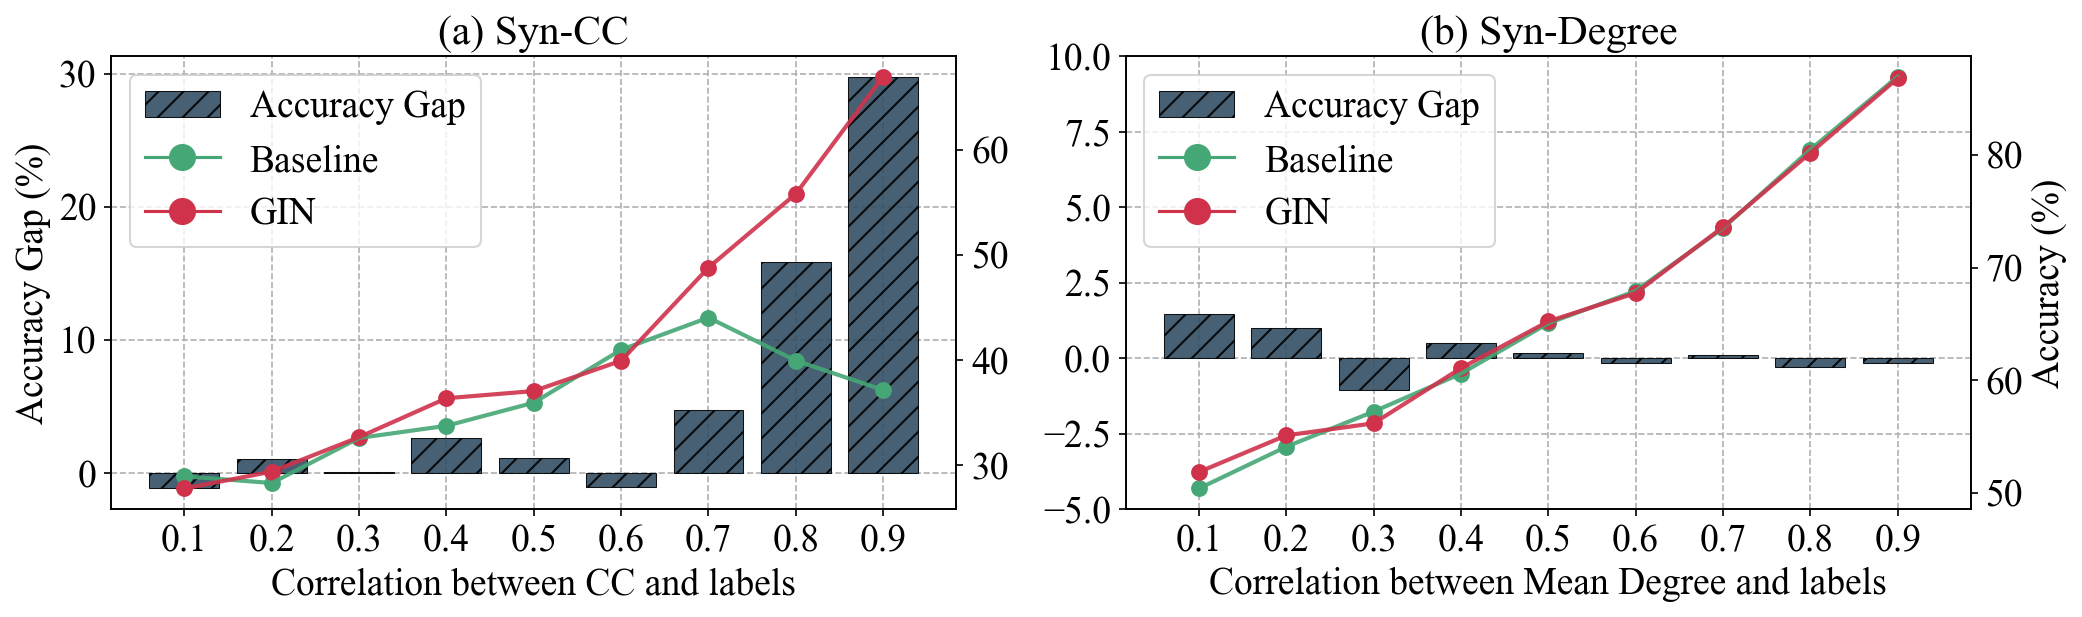

In [438]:
plot_syn_absolute_and_gap(all_e_cc, all_e_degree)

/var/folders/4n/148zpws12pg_5_jvdqkrr1p80000gn/T/ipykernel_9871/1488963217.py:29: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(legs, labels=["$\mathcal{E}_A$", "$\mathcal{E}_S$"], fontsize=24)


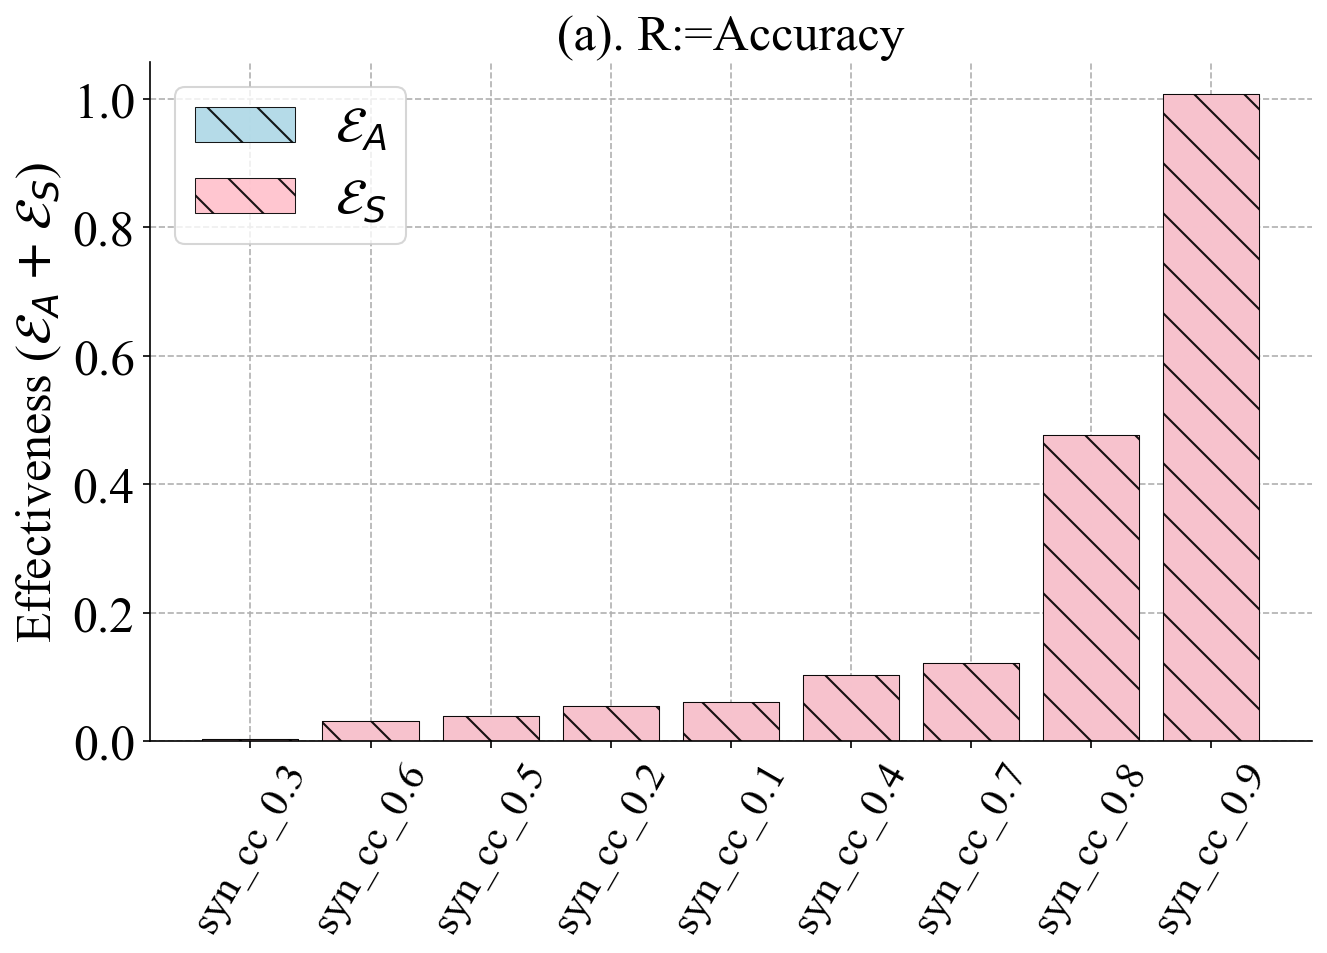

In [296]:
# New E definition:

# class factor = 1
plot_whole_dataset_E(all_e_cc, title='(a). R:=Accuracy')

# E of syn degree 0.1 - 0.9

dict_keys(['REDDIT-BINARY', 'REDDIT-MULTI-5K', 'COLLAB', 'IMDB-BINARY', 'IMDB-MULTI', 'NCI1', 'AIDS', 'ENZYMES', 'PROTEINS', 'DD', 'MUTAG', 'CSL', 'CIFAR10', 'MNIST', 'PPI', 'hiv', 'bace', 'bbpb', 'ogbg_molhiv', 'ogbg_ppa', 'PTC', 'QM9', 'ogbg_moltox21', 'ogbg-molbbbp', 'ogbg-molbace', 'syn_cc', 'syn_degree'])
syn_degree: MLP_test_acc_attr None
syn_degree: GNN_test_acc_attr None

syn_degree: MLP_test_acc_struct 50.37510007222493
syn_degree: GNN_test_acc_struct 51.83986905415852
syn_degree: MLP_test_acc_attr None
syn_degree: GNN_test_acc_attr None

syn_degree: MLP_test_acc_struct 54.08632253011067
syn_degree: GNN_test_acc_struct 55.09429359436035
syn_degree: MLP_test_acc_attr None
syn_degree: GNN_test_acc_attr None

syn_degree: MLP_test_acc_struct 57.20859247843424
syn_degree: GNN_test_acc_struct 56.165949376424145
syn_degree: MLP_test_acc_attr None
syn_degree: GNN_test_acc_attr None

syn_degree: MLP_test_acc_struct 60.57954711914063
syn_degree: GNN_test_acc_struct 61.069026056925466
sy

/var/folders/4n/148zpws12pg_5_jvdqkrr1p80000gn/T/ipykernel_9871/1488963217.py:29: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(legs, labels=["$\mathcal{E}_A$", "$\mathcal{E}_S$"], fontsize=24)


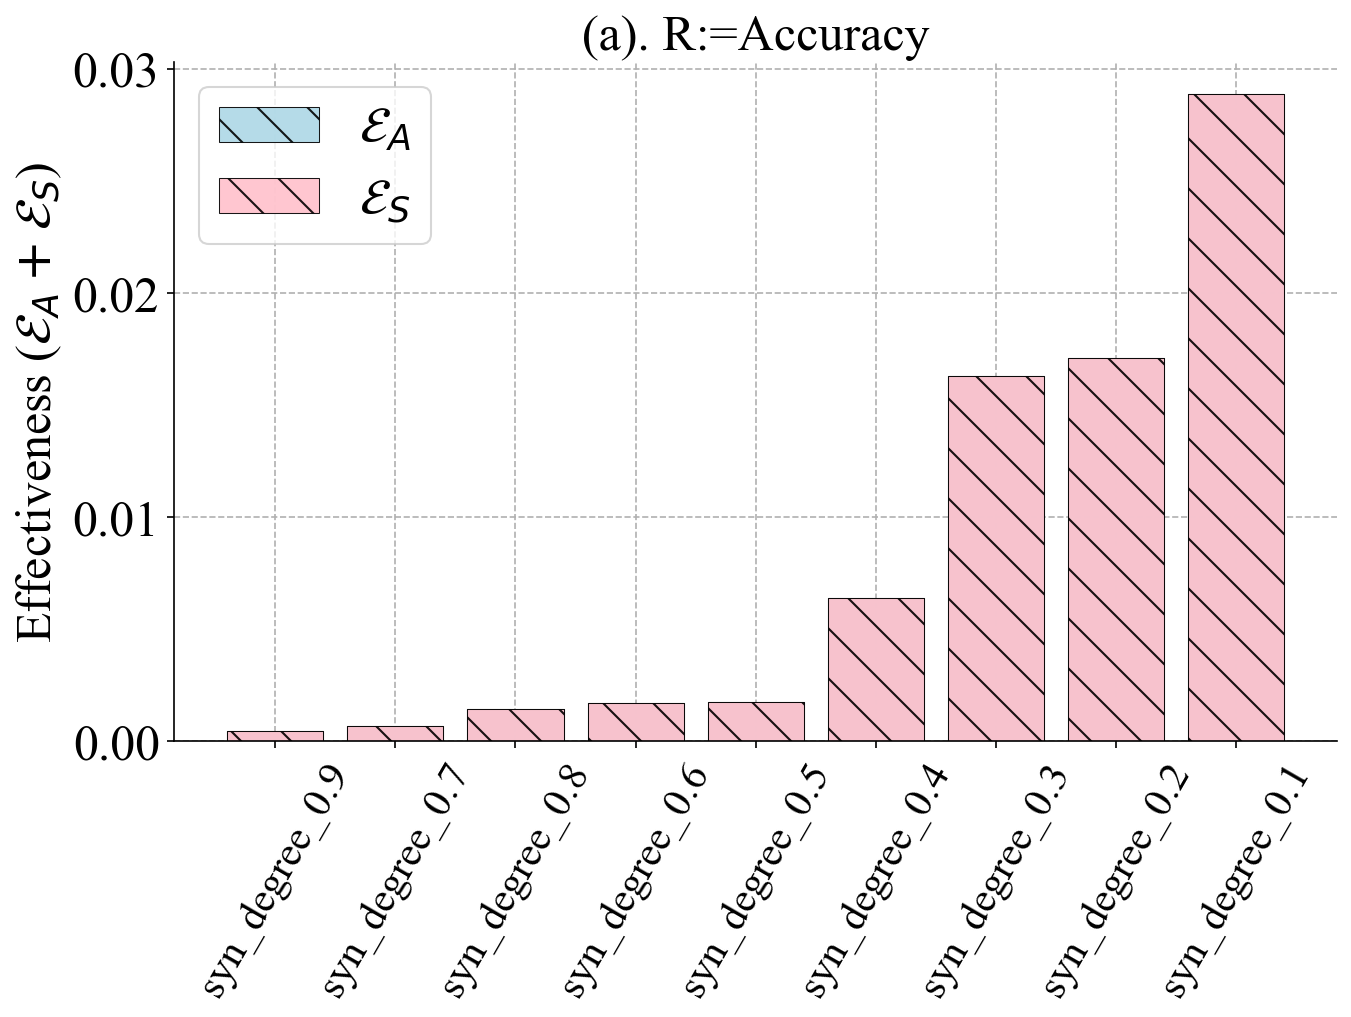

In [279]:
# New E definition:

import importlib
import generate_regression_datasets as grd

importlib.reload(grd)

as_whole = True

all_e_degree = []

all_e_d = grd.generate_syn_degree(as_whole, return_E=True, dim_y=2, class_num=2)

for i, e in enumerate(all_e_d):
    print('corr:', round((i+1)/10.0, 1))
    all_e_degree.append((e, f'syn_degree_{round((i+1)/10.0, 1)}'))


# class factor = 1
plot_whole_dataset_E(all_e_degree, title='(a). R:=Accuracy')

/var/folders/4n/148zpws12pg_5_jvdqkrr1p80000gn/T/ipykernel_1098/1488963217.py:29: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(legs, labels=["$\mathcal{E}_A$", "$\mathcal{E}_S$"], fontsize=24)


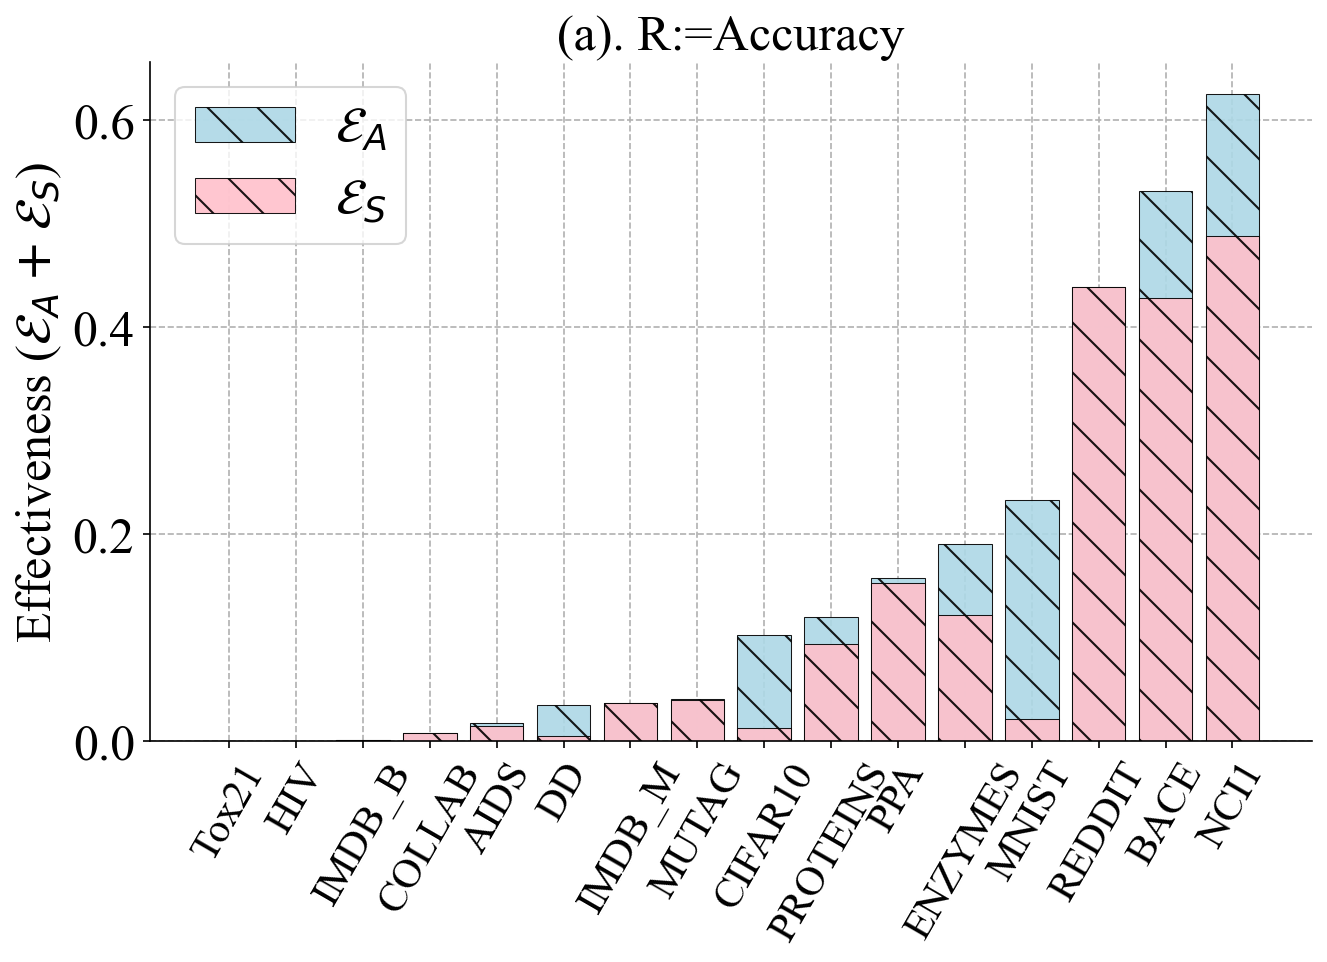

In [130]:
# New E definition:

# class factor = 1
plot_whole_dataset_E(all_e, title='(a). R:=Accuracy')

# plot ROC-AUC E;

dict_keys(['REDDIT-BINARY', 'REDDIT-MULTI-5K', 'COLLAB', 'IMDB-BINARY', 'IMDB-MULTI', 'NCI1', 'AIDS', 'ENZYMES', 'PROTEINS', 'DD', 'MUTAG', 'CSL', 'CIFAR10', 'MNIST', 'PPI', 'hiv', 'bace', 'bbpb', 'ogbg_molhiv', 'ogbg_ppa', 'PTC', 'QM9', 'ogbg_moltox21', 'ogbg-molbbbp', 'ogbg-molbace', 'syn_cc'])
MUTAG: MLP_test_acc_attr 0.8073717948717949
MUTAG: GNN_test_acc_attr 0.8319597069597069

MUTAG: MLP_test_acc_struct 0.7968711843711844
MUTAG: GNN_test_acc_struct 0.8541971916971918
NCI1: MLP_test_acc_attr 0.6676466177283132
NCI1: GNN_test_acc_attr 0.8053982161180834

NCI1: MLP_test_acc_struct 0.5062179335385587
NCI1: GNN_test_acc_struct 0.7554664930144446
AIDS: MLP_test_acc_attr 0.9788541666666667
AIDS: GNN_test_acc_attr 0.9283333333333333

AIDS: MLP_test_acc_struct 0.7299999999999999
AIDS: GNN_test_acc_struct 0.9230208333333334
DD: MLP_test_acc_attr 0.7503452504190082
DD: GNN_test_acc_attr 0.6946050231686878

DD: MLP_test_acc_struct 0.5587649117618062
DD: GNN_test_acc_struct 0.584929631272799

/var/folders/4n/148zpws12pg_5_jvdqkrr1p80000gn/T/ipykernel_1098/1488963217.py:29: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(legs, labels=["$\mathcal{E}_A$", "$\mathcal{E}_S$"], fontsize=24)
/var/folders/4n/148zpws12pg_5_jvdqkrr1p80000gn/T/ipykernel_1098/1488963217.py:29: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(legs, labels=["$\mathcal{E}_A$", "$\mathcal{E}_S$"], fontsize=24)


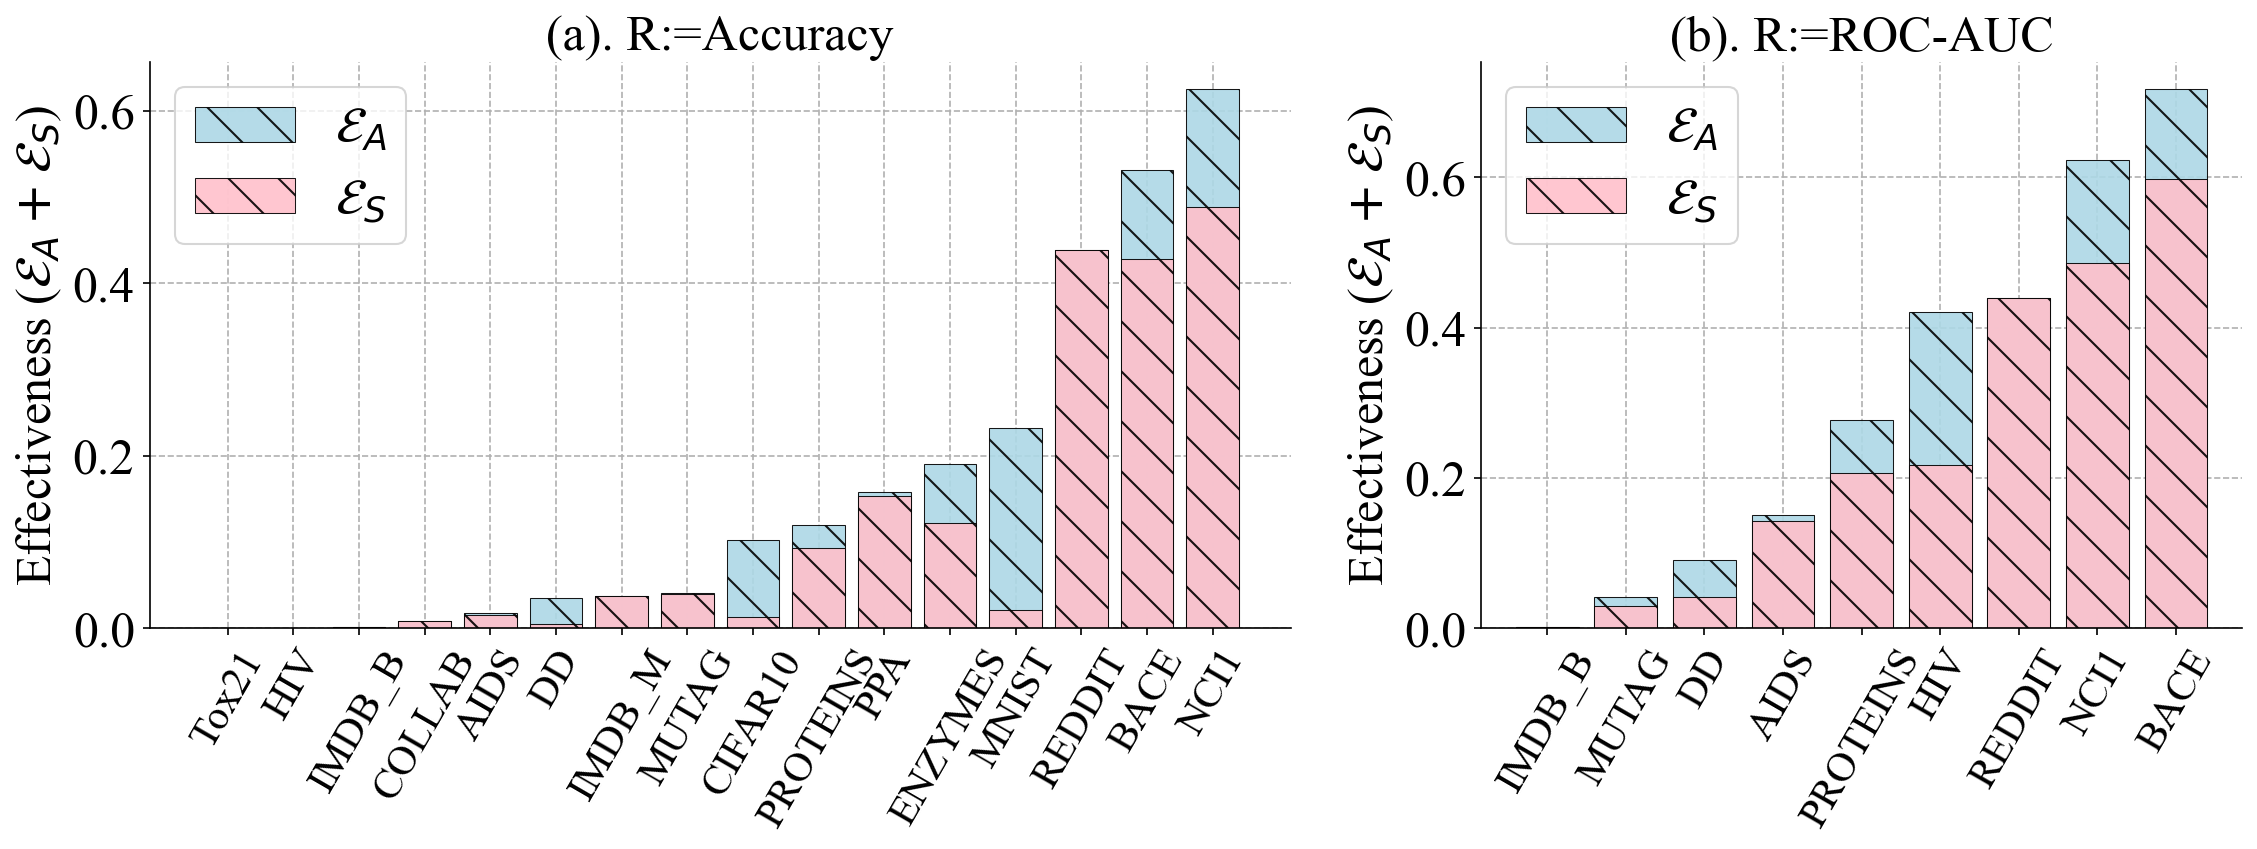

In [132]:
# New E definition:
import importlib
import generate_regression_datasets as grd

importlib.reload(grd)

as_whole = True

roc_auc = True
all_e_roc = []
all_e_roc.append((grd.generate_mutag(as_whole, return_E=True, dim_y=2, roc_auc=roc_auc), 'mutag'))
all_e_roc.append((grd.generate_NCI1(as_whole, return_E=True, dim_y=2, roc_auc=roc_auc), 'nci1'))
all_e_roc.append((grd.generate_AIDS(as_whole, return_E=True, dim_y=2, roc_auc=roc_auc), 'aids'))
all_e_roc.append((grd.generate_DD(as_whole, return_E=True, dim_y=2, roc_auc=roc_auc), 'dd'))
# all_e.append((grd.generate_ENZYMES(as_whole, return_E=True, dim_y=6), 'enzymes'))
all_e_roc.append((grd.generate_PROTEINS(as_whole, return_E=True, dim_y=2, roc_auc=roc_auc), 'proteins'))
all_e_roc.append((grd.generate_bace(as_whole, return_E=True, dim_y=2, roc_auc=roc_auc), 'bace'))
all_e_roc.append((grd.generate_HIV(as_whole, return_E=True, dim_y=2, roc_auc=roc_auc), 'hiv'))
# all_e.append((grd.generate_tox21(as_whole, return_E=True, dim_y=12), 'tox21'))
# all_e.append((grd.generate_ppa(as_whole, return_E=True, dim_y=37), 'ppa'))
# all_e.append((grd.generate_IMDB_M(as_whole, return_E=True, dim_y=3), 'imdb_m'))
all_e_roc.append((grd.generate_IMDB_B(as_whole, return_E=True, dim_y=2, roc_auc=roc_auc), 'imdb_b'))
all_e_roc.append((grd.generate_REDDITB(as_whole, return_E=True, dim_y=2, roc_auc=roc_auc), 'reddit'))
# all_e.append((grd.generate_COLLAB(as_whole, return_E=True, dim_y=3), 'collab'))
# all_e.append((grd.generate_CIFAR10(as_whole, return_E=True, dim_y=10), 'cifar10'))
# all_e.append((grd.generate_MNIST(as_whole, return_E=True, dim_y=10), 'mnist'))

# class factor = 1

fig, axs = plt.subplots(1, 2, figsize=(18, 5), dpi=150, gridspec_kw={'width_ratios': [1.5, 1]})

plot_whole_dataset_E(all_e, ax=axs[0], title='(a). R:=Accuracy')

plot_whole_dataset_E(all_e_roc, ax=axs[1], fig_size=(8, 6), title='(b). R:=ROC-AUC')

[ 0.         -0.05555556 -0.11111111 -0.16666667 -0.22222222 -0.27777778
 -0.33333333 -0.38888889 -0.44444444 -0.5       ]
Y:  2  min_A1_A2 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5] , D:  [ 0.         -0.05555556 -0.11111111 -0.16666667 -0.22222222 -0.27777778
 -0.33333333 -0.38888889 -0.44444444 -0.5       ]
[ 0.         -0.07407407 -0.14814815 -0.22222222 -0.2962963  -0.37037037
 -0.44444444 -0.51851852 -0.59259259 -0.66666667]
Y:  3  min_A1_A2 [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333] , D:  [ 0.         -0.07407407 -0.14814815 -0.22222222 -0.2962963  -0.37037037
 -0.44444444 -0.51851852 -0.59259259 -0.66666667]
[ 0.         -0.08333333 -0.16666667 -0.25       -0.33333333 -0.41666667
 -0.5        -0.58333333 -0.66666667 -0.75      ]
Y:  4  min_A1_A2 [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25] , D:  [ 0.         -0.08333333 -0.16666667 -0.25       -0.33333333 -0.41666667
 -0.5        -0.58333333 -0.66666667

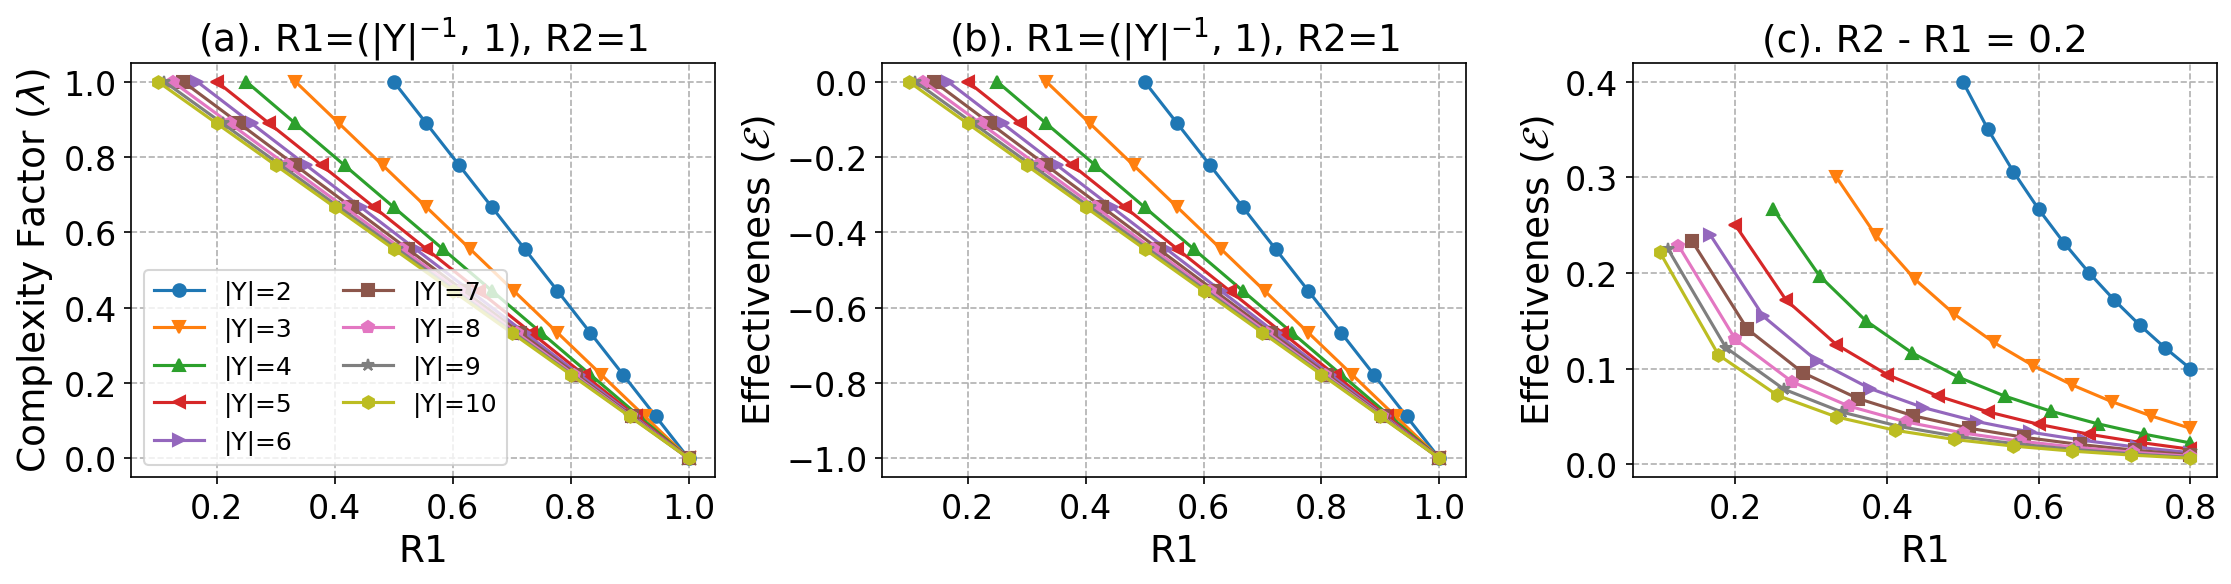

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_F(D, A1, A2, Y):
    """
    Calculate M given D, A1, A2, and Y.
    """
    min_A1_A2 = np.minimum(A1, A2)
    return ((1 - np.maximum(min_A1_A2, (1/Y))) / (1 - (1/Y)))


def calculate_M(D, A1, A2, Y):
    """
    Calculate M given D, A1, A2, and Y.
    """
    print(D)
    min_A1_A2 = np.minimum(A1, A2)
    print('Y: ', Y,' min_A1_A2', min_A1_A2, ', D: ', D)
    return D/ min_A1_A2 / (Y-1) * (1 - min_A1_A2) / (1 - (1/Y))



my_fontsize=18
def simulate_and_plot():
    # Create an array of integers from 2 to 10 for Y
    Y_values = np.arange(2, 11)
    # We will use these markers for different Y values
    markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 4), dpi=150)
    
    # A1 ranges from 1/Y to 1, A2 is 1
    A2 = np.ones(10)
    for idx, Y in enumerate(Y_values):
        # Create A1 from 1/Y to 1
        A1 = np.linspace(1.0/Y, 1.0, 10)
        # D is A2 - A1
        D = A2 - A1
        # Calculate M
        M = calculate_F(D, A1, A2, Y)
        # Plot M
        axs[0].plot(A1, M, marker=markers[idx % len(markers)], label=f'|Y|={Y}')
    

    axs[0].set_title('(a). R1=(|Y$|^{-1}$, 1), R2=1',fontsize=my_fontsize)
    axs[0].set_xlabel('R1',fontsize=my_fontsize)
    axs[0].set_ylabel('Complexity Factor ($\lambda$)', fontsize=my_fontsize)
    
    axs[0].legend(ncol=2,fontsize=12)
    axs[0].grid(True, linestyle='dashed')

    # A1 is 1/Y, A2 ranges from 1/Y to 1
    
      # A1 ranges from 1/Y to 1, A2 is 1
    
    for idx, Y in enumerate(Y_values):
        # Create A1 from 1/Y to 1
        # A2= (np.ones(10)-1/Y)/2 + 1/Y
        
        # A2 = np.ones(10)
        A2 = 1/Y

        
        A1 = np.linspace(1.0/Y, 1.0, 10)
        # D is A2 - A1
        D = A2 - A1
        # Calculate M
        M = calculate_M(D, A1, A2, Y)
        # Plot M
        axs[1].plot(A1, M, marker=markers[idx % len(markers)], label=f'|Y|={Y}')
    
    # for idx, Y in enumerate(Y_values):
    #     # Set A1 to 1/Y
    #     A1 = np.full(10, 1.0/Y)
    #     # Create A2 from 1/Y to 1
    #     A2 = np.linspace(1.0/Y, 1.0, 10)
    #     # D is A2 - A1
    #     D = A2 - A1
    #     # Calculate M
    #     M = calculate_M(D, A1, A2, Y)
    #     # Plot M
    #     axs[1].plot(A2, M, marker=markers[idx % len(markers)], label=f'|Y|={Y}')

    axs[1].set_title('(b). R1=(|Y$|^{-1}$, 1), R2=1',fontsize=my_fontsize)
    axs[1].set_xlabel('R1',fontsize=my_fontsize)
    axs[1].set_ylabel('Effectiveness ($\mathcal{E})$', fontsize=my_fontsize)
    
    # axs[1].legend(ncol=1,fontsize=12)
    axs[1].grid(True, linestyle='dashed')

    # D is 0.1, A1 ranges from 1/Y to 0.9, A2 is calculated as A1 + D
    D = 0.2
    for idx, Y in enumerate(Y_values):
        # Create A1 from 1/Y to 0.9
        A1 = np.linspace(1.0/Y, 1-D, 10)
        # Calculate A2 as A1 + D
        
        A2 = A1 + D
        # Calculate M
        M = calculate_M(D, A1, A2, Y)
        # Plot M
        axs[2].plot(A1, M, marker=markers[idx % len(markers)], label=f'|Y|={Y}')

    axs[2].set_title('(c). R2 - R1 = 0.2',fontsize=my_fontsize)
    axs[2].set_xlabel('R1',fontsize=my_fontsize)
    axs[2].set_ylabel('Effectiveness ($\mathcal{E})$', fontsize=my_fontsize)
    # axs[2].legend(ncol=3, fontsize=12)
    axs[2].grid(True, linestyle='dashed')
    
    for ax in axs:
        ax.yaxis.set_tick_params(labelsize=my_fontsize-2)
        ax.xaxis.set_tick_params(labelsize=my_fontsize-2)
    # Show plot
    
    
    handles, labels = axs[0].get_legend_handles_labels()

    plt.tight_layout()
    plt.show()

# Call the function
simulate_and_plot()
